# HISTORY

* A long standing goal in astrophysics is to directly observe the immediate environment of a black hole with angular resolution comparable to the event horizon. Such observations could lead to images of strong gravity effects that are expected near a black hole, and to the direct detection of dynamics near the black hole as matter orbits at near light speeds. This capability would open a new window on the study of general relativity in the strong field regime, accretion and outflow processes at the edge of a black hole, the existence of event horizons, and fundamental black hole physics.

* The EHT is an international collaboration that has formed to continue the steady long-term progress on improving the capability of Very Long Baseline Interferometry (VLBI) at short wavelengths in pursuit of this goal. This technique of linking radio dishes across the globe to create an Earth-sized interferometer, has been used to measure the size of the emission regions of the two supermassive black holes with the largest apparent event horizons: SgrA* at the center of the Milky Way and M87 in the center of the Virgo A galaxy. In both cases, the sizes match that of the predicted silhouette caused by the extreme lensing of light by the black hole. Addition of key millimeter and submillimeter wavelength facilities at high altitude sites has now opened the possibility of imaging such features and sensing the dynamic evolution of black hole accretion. The EHT project includes theoretical and simulation studies that are framing questions rooted at the black hole boundary that may soon be answered through observations.

* By linking together existing telescopes using novel systems, the EHT leverages considerable global investment to create a fundamentally new instrument with angular resolving power that is the highest possible from the surface of the Earth. Over the coming years, the international EHT team will mount observing campaigns of increasing resolving power and sensitivity, aiming to bring black holes into focus.

![](https://static.projects.iq.harvard.edu/files/styles/os_slideshow_3%3A1_980/public/eht/files/20190410-78m-4000x2330.jpg?m=1570794239&itok=nPArMslB)

# PACKAGES AND LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import random
import time
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
from scipy.io import loadmat
import nibabel as nib
import csv
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from IPython import display
from scipy.ndimage import gaussian_filter
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as patches
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape, Conv2DTranspose,\
LeakyReLU, GaussianNoise, GlobalMaxPooling2D, ReLU, Input, Concatenate
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
import keras
from keras.models import Model
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# OVERVIEW AND ANALYSIS PROCESS

#### PATH

In [2]:
Dir_Path = Path("../input/powehi-black-hole-real-time-simulation-set-eht/Black_Hole_Real_Simulations")

#### MOV / MP4

In [3]:
MP4_Path = list(Dir_Path.glob(r"*.mp4"))
MP4_Path.append(Dir_Path.glob(r"*.mov"))

In [4]:
print("LEN VIDEO LIST: ",len(MP4_Path))

LEN VIDEO LIST:  9


In [5]:
Video_Series = pd.Series(MP4_Path,name="VIDEO").astype(str)

In [6]:
print(Video_Series.head(-1))

0    ../input/powehi-black-hole-real-time-simulatio...
1    ../input/powehi-black-hole-real-time-simulatio...
2    ../input/powehi-black-hole-real-time-simulatio...
3    ../input/powehi-black-hole-real-time-simulatio...
4    ../input/powehi-black-hole-real-time-simulatio...
5    ../input/powehi-black-hole-real-time-simulatio...
6    ../input/powehi-black-hole-real-time-simulatio...
7    ../input/powehi-black-hole-real-time-simulatio...
Name: VIDEO, dtype: object


In [7]:
print(Video_Series[0])
print("---"*10)
print(Video_Series[2])
print("---"*10)
print(Video_Series[7])

../input/powehi-black-hole-real-time-simulation-set-eht/Black_Hole_Real_Simulations/Accretion Disk.mp4
------------------------------
../input/powehi-black-hole-real-time-simulation-set-eht/Black_Hole_Real_Simulations/1 mm Wavelength.mp4
------------------------------
../input/powehi-black-hole-real-time-simulation-set-eht/Black_Hole_Real_Simulations/Accretion Disk_II.mp4


#### VIDEO TRANSFORMATION

* we will use just Accretion Disk Video, but I want to show hot to export all frames

##### TOTAL

In [8]:
Black_Hole_Image = []

for file_name in Video_Series:
    Video_File = file_name
    
    Video_Caption = cv2.VideoCapture(Video_File)
    
    while Video_Caption.isOpened():
        
        _,frame = Video_Caption.read()
        
        if _ != True:
            break
            
        if Video_Caption.isOpened():
            
            Transformed_IMG = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
            Resized_IMG = cv2.resize(Transformed_IMG,(180,180),interpolation=cv2.INTER_CUBIC)
            Black_Hole_Image.append(Resized_IMG)

In [9]:
print("LEN LIST: ",len(Black_Hole_Image))
print("LEN ARRAY: ",np.shape(np.array(Black_Hole_Image)))

LEN LIST:  7235
LEN ARRAY:  (7235, 180, 180, 3)


In [10]:
plt.style.use("dark_background")

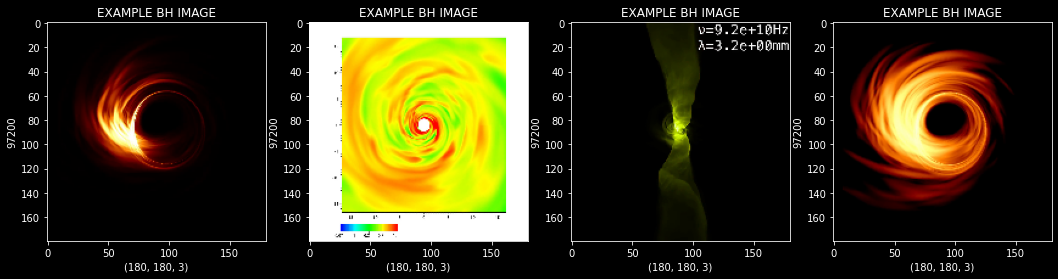

In [11]:
figure,axis = plt.subplots(1,4,figsize=(18,18))

axis[0].set_xlabel(Black_Hole_Image[0].shape)
axis[0].set_ylabel(Black_Hole_Image[0].size)
axis[0].set_title("EXAMPLE BH IMAGE")
axis[0].imshow(Black_Hole_Image[0])

axis[1].set_xlabel(Black_Hole_Image[567].shape)
axis[1].set_ylabel(Black_Hole_Image[567].size)
axis[1].set_title("EXAMPLE BH IMAGE")
axis[1].imshow(Black_Hole_Image[567])

axis[2].set_xlabel(Black_Hole_Image[3400].shape)
axis[2].set_ylabel(Black_Hole_Image[3400].size)
axis[2].set_title("EXAMPLE BH IMAGE")
axis[2].imshow(Black_Hole_Image[3400])

axis[3].set_xlabel(Black_Hole_Image[7000].shape)
axis[3].set_ylabel(Black_Hole_Image[7000].size)
axis[3].set_title("EXAMPLE BH IMAGE")
axis[3].imshow(Black_Hole_Image[7000])

##### SPECIFIC

In [12]:
Accretion_Disk_Path = "../input/powehi-black-hole-real-time-simulation-set-eht/Black_Hole_Real_Simulations/Accretion Disk.mp4"

Acc_List = []

Acc_Video = cv2.VideoCapture(Accretion_Disk_Path)

while Acc_Video.isOpened():
    
    _,frame = Acc_Video.read()
    
    if _ != True:
        break
        
    if Acc_Video.isOpened():
        
        Transformed_IMG = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
        Resized_IMG = cv2.resize(Transformed_IMG,(180,180),interpolation=cv2.INTER_CUBIC)
        Acc_List.append(Resized_IMG)

In [13]:
print("LEN LIST: ",len(Acc_List))
print("LEN ARRAY: ",np.shape(np.array(Acc_List)))

LEN LIST:  513
LEN ARRAY:  (513, 180, 180, 3)


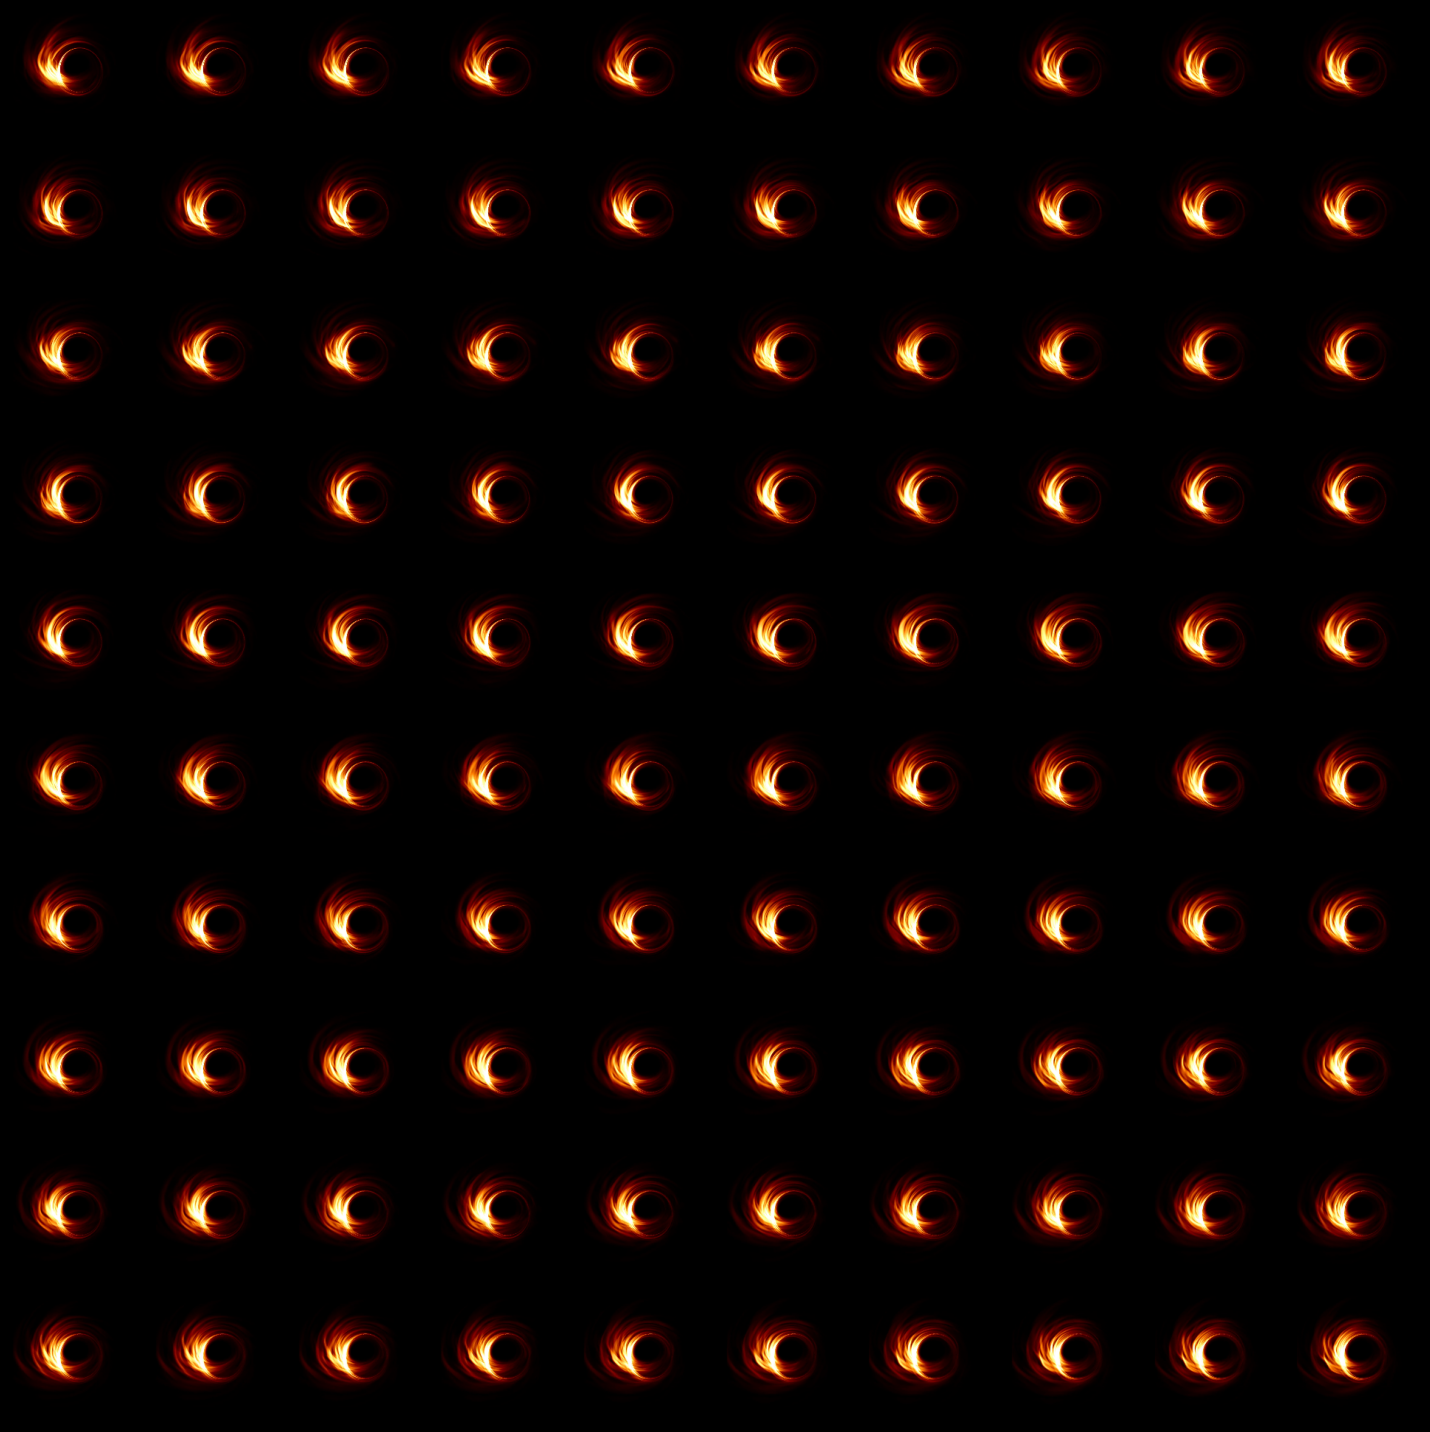

In [14]:
figure,axis = plt.subplots(10,10,figsize=(20,20))

for indexing,operations in enumerate(axis.flat):
    
    Picking_IMG = Acc_List[indexing*5]
    
    operations.imshow(Picking_IMG)
    operations.axis("off")
    
plt.tight_layout()
plt.show()

#### ANALYSIS

##### THRESHOLD TYPE

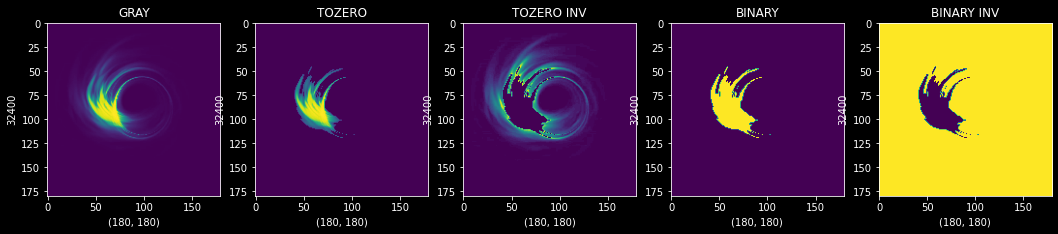

In [15]:
figure,axis = plt.subplots(1,5,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TOZERO)
_,Threshold_IMG_TOZERO_INV = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TOZERO_INV)
_,Threshold_IMG_BINARY = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_BINARY)
_,Threshold_IMG_BINARY_INV = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_BINARY_INV)

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG)

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO)

axis[2].set_xlabel(Threshold_IMG_TOZERO_INV.shape)
axis[2].set_ylabel(Threshold_IMG_TOZERO_INV.size)
axis[2].set_title("TOZERO INV")
axis[2].imshow(Threshold_IMG_TOZERO_INV)

axis[3].set_xlabel(Threshold_IMG_BINARY.shape)
axis[3].set_ylabel(Threshold_IMG_BINARY.size)
axis[3].set_title("BINARY")
axis[3].imshow(Threshold_IMG_BINARY)

axis[4].set_xlabel(Threshold_IMG_BINARY_INV.shape)
axis[4].set_ylabel(Threshold_IMG_BINARY_INV.size)
axis[4].set_title("BINARY INV")
axis[4].imshow(Threshold_IMG_BINARY_INV)

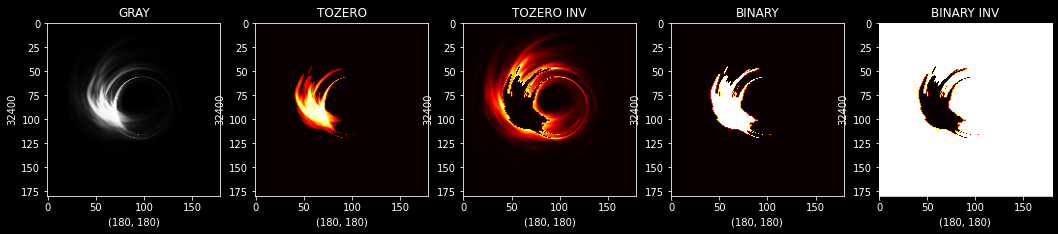

In [16]:
figure,axis = plt.subplots(1,5,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TOZERO)
_,Threshold_IMG_TOZERO_INV = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TOZERO_INV)
_,Threshold_IMG_BINARY = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_BINARY)
_,Threshold_IMG_BINARY_INV = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_BINARY_INV)

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Threshold_IMG_TOZERO_INV.shape)
axis[2].set_ylabel(Threshold_IMG_TOZERO_INV.size)
axis[2].set_title("TOZERO INV")
axis[2].imshow(Threshold_IMG_TOZERO_INV,cmap="hot")

axis[3].set_xlabel(Threshold_IMG_BINARY.shape)
axis[3].set_ylabel(Threshold_IMG_BINARY.size)
axis[3].set_title("BINARY")
axis[3].imshow(Threshold_IMG_BINARY,cmap="hot")

axis[4].set_xlabel(Threshold_IMG_BINARY_INV.shape)
axis[4].set_ylabel(Threshold_IMG_BINARY_INV.size)
axis[4].set_title("BINARY INV")
axis[4].imshow(Threshold_IMG_BINARY_INV,cmap="hot")

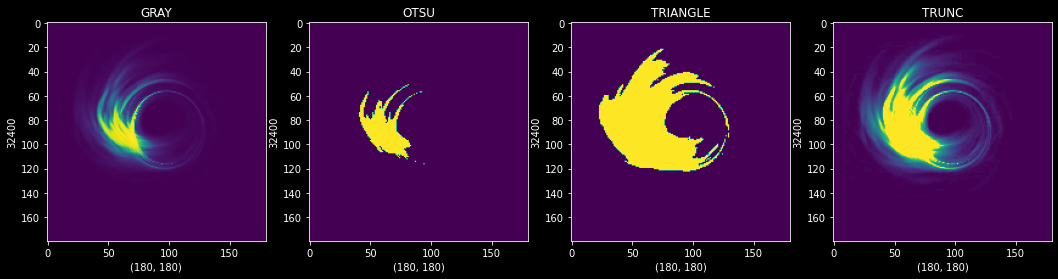

In [17]:
figure,axis = plt.subplots(1,4,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_OTSU = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_OTSU)
_,Threshold_IMG_TRIANGLE = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TRIANGLE)
_,Threshold_IMG_TRUNC = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TRUNC)

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG)

axis[1].set_xlabel(Threshold_IMG_OTSU.shape)
axis[1].set_ylabel(Threshold_IMG_OTSU.size)
axis[1].set_title("OTSU")
axis[1].imshow(Threshold_IMG_OTSU)

axis[2].set_xlabel(Threshold_IMG_TRIANGLE.shape)
axis[2].set_ylabel(Threshold_IMG_TRIANGLE.size)
axis[2].set_title("TRIANGLE")
axis[2].imshow(Threshold_IMG_TRIANGLE)

axis[3].set_xlabel(Threshold_IMG_TRUNC.shape)
axis[3].set_ylabel(Threshold_IMG_TRUNC.size)
axis[3].set_title("TRUNC")
axis[3].imshow(Threshold_IMG_TRUNC)

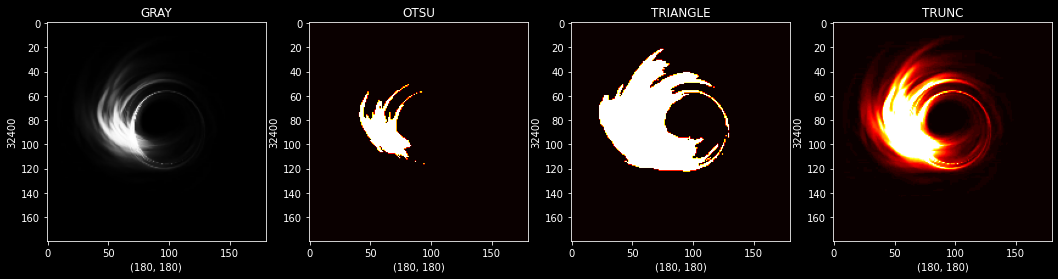

In [18]:
figure,axis = plt.subplots(1,4,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_OTSU = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_OTSU)
_,Threshold_IMG_TRIANGLE = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TRIANGLE)
_,Threshold_IMG_TRUNC = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TRUNC)

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_OTSU.shape)
axis[1].set_ylabel(Threshold_IMG_OTSU.size)
axis[1].set_title("OTSU")
axis[1].imshow(Threshold_IMG_OTSU,cmap="hot")

axis[2].set_xlabel(Threshold_IMG_TRIANGLE.shape)
axis[2].set_ylabel(Threshold_IMG_TRIANGLE.size)
axis[2].set_title("TRIANGLE")
axis[2].imshow(Threshold_IMG_TRIANGLE,cmap="hot")

axis[3].set_xlabel(Threshold_IMG_TRUNC.shape)
axis[3].set_ylabel(Threshold_IMG_TRUNC.size)
axis[3].set_title("TRUNC")
axis[3].imshow(Threshold_IMG_TRUNC,cmap="hot")

##### CANNY TYPE

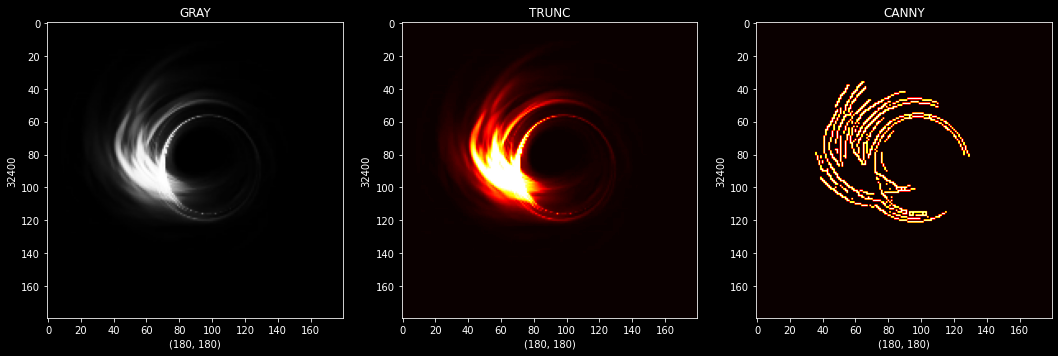

In [19]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TRUNC = cv2.threshold(Gray_IMG,220,255,cv2.THRESH_TRUNC)
Canny_IMG = cv2.Canny(Threshold_IMG_TRUNC,55,100)

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TRUNC.shape)
axis[1].set_ylabel(Threshold_IMG_TRUNC.size)
axis[1].set_title("TRUNC")
axis[1].imshow(Threshold_IMG_TRUNC,cmap="hot")

axis[2].set_xlabel(Canny_IMG.shape)
axis[2].set_ylabel(Canny_IMG.size)
axis[2].set_title("CANNY")
axis[2].imshow(Canny_IMG,cmap="hot")

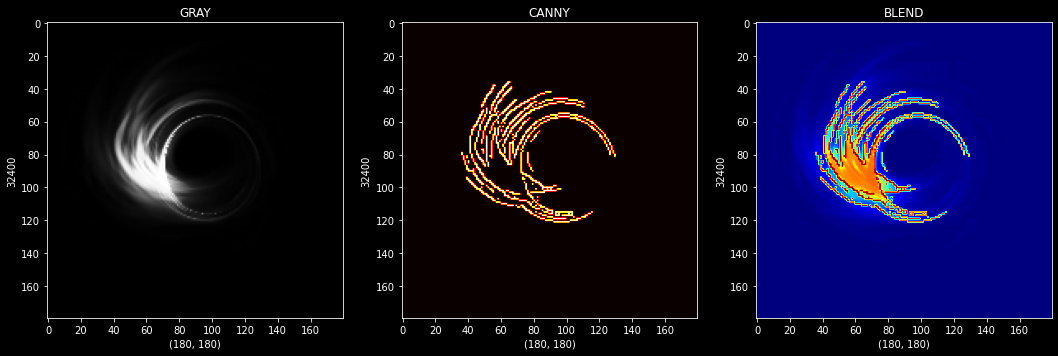

In [20]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TRUNC = cv2.threshold(Gray_IMG,220,255,cv2.THRESH_TRUNC)
Canny_IMG = cv2.Canny(Threshold_IMG_TRUNC,55,100)
Blend_IMG = cv2.addWeighted(Gray_IMG,0.8,Canny_IMG,0.8,0.1)

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Canny_IMG.shape)
axis[1].set_ylabel(Canny_IMG.size)
axis[1].set_title("CANNY")
axis[1].imshow(Canny_IMG,cmap="hot")

axis[2].set_xlabel(Blend_IMG.shape)
axis[2].set_ylabel(Blend_IMG.size)
axis[2].set_title("BLEND")
axis[2].imshow(Blend_IMG,cmap="jet")

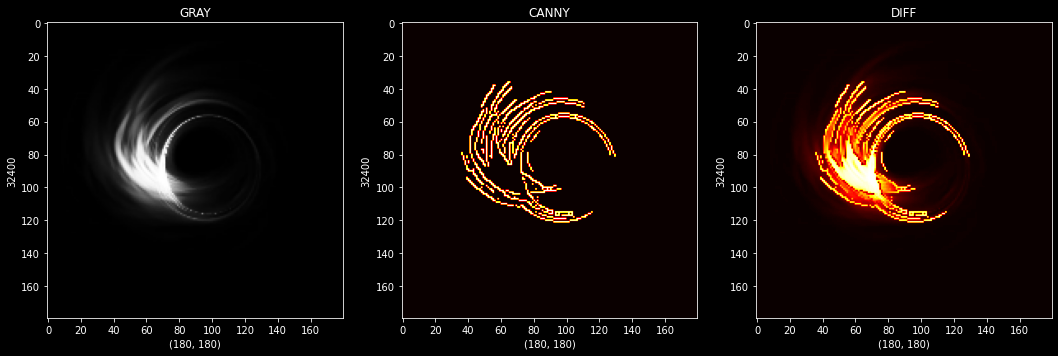

In [21]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TRUNC = cv2.threshold(Gray_IMG,220,255,cv2.THRESH_TRUNC)
Canny_IMG = cv2.Canny(Threshold_IMG_TRUNC,55,100)
Diff_Image = cv2.absdiff(Gray_IMG,Canny_IMG,np.zeros((2,2)))

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Canny_IMG.shape)
axis[1].set_ylabel(Canny_IMG.size)
axis[1].set_title("CANNY")
axis[1].imshow(Canny_IMG,cmap="hot")

axis[2].set_xlabel(Diff_Image.shape)
axis[2].set_ylabel(Diff_Image.size)
axis[2].set_title("DIFF")
axis[2].imshow(Diff_Image,cmap="hot")

##### EQUALIZE HISTOGRAM

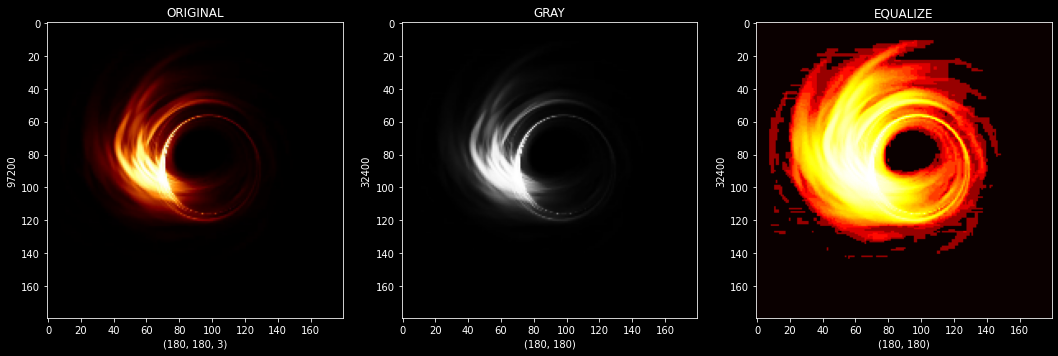

In [22]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
Equalize_IMG = cv2.equalizeHist(Gray_IMG)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG,cmap="gray")

axis[1].set_xlabel(Gray_IMG.shape)
axis[1].set_ylabel(Gray_IMG.size)
axis[1].set_title("GRAY")
axis[1].imshow(Gray_IMG,cmap="gray")

axis[2].set_xlabel(Equalize_IMG.shape)
axis[2].set_ylabel(Equalize_IMG.size)
axis[2].set_title("EQUALIZE")
axis[2].imshow(Equalize_IMG,cmap="hot")

Text(0, 0.5, 'Pixels')

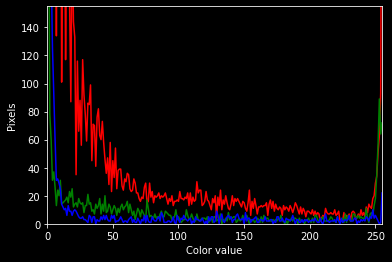

In [23]:
Single_Image = Acc_List[1]
    
colors = ("red", "green", "blue")
channel_dim = (0, 1, 2)

plt.xlim([0, 255])
plt.ylim([0, 155])

for channel_id, c in zip(channel_dim, colors):
    histogram, bin_edges = np.histogram(
    Single_Image[:, :, channel_id], bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

Text(0, 0.5, 'Pixels')

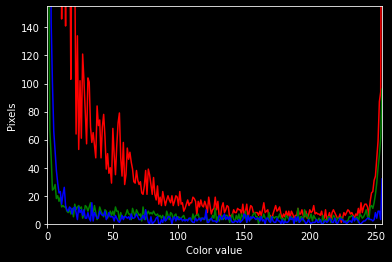

In [24]:
Single_Image = Acc_List[100]
    
colors = ("red", "green", "blue")
channel_dim = (0, 1, 2)

plt.xlim([0, 255])
plt.ylim([0, 155])

for channel_id, c in zip(channel_dim, colors):
    histogram, bin_edges = np.histogram(
    Single_Image[:, :, channel_id], bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

Text(0, 0.5, 'Pixels')

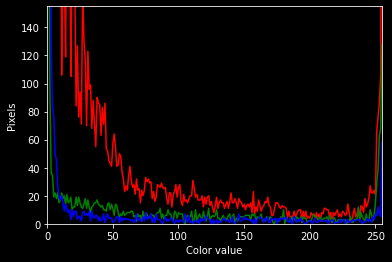

In [25]:
Single_Image = Acc_List[433]
    
colors = ("red", "green", "blue")
channel_dim = (0, 1, 2)

plt.xlim([0, 255])
plt.ylim([0, 155])

for channel_id, c in zip(channel_dim, colors):
    histogram, bin_edges = np.histogram(
    Single_Image[:, :, channel_id], bins=256, range=(0, 256))
    plt.plot(bin_edges[0:-1], histogram, color=c)

plt.xlabel("Color value")
plt.ylabel("Pixels")

##### CLAHE TYPE

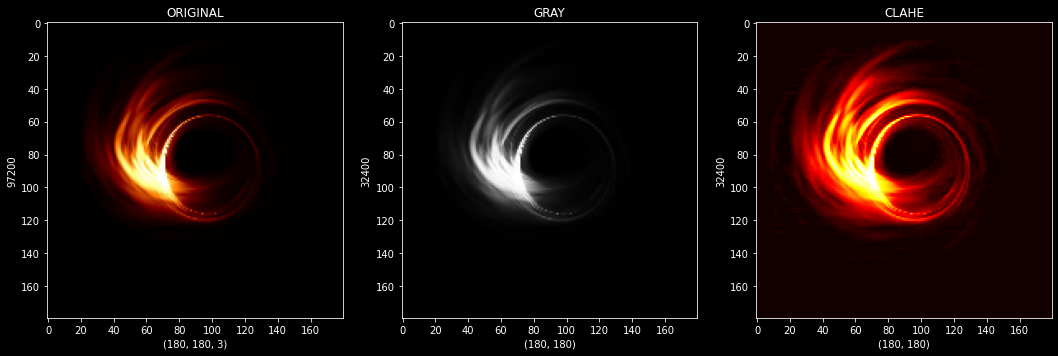

In [26]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)

Clahe_Func = cv2.createCLAHE(clipLimit=5.0,tileGridSize=(8,8))
Apply_Clahe = Clahe_Func.apply(Gray_IMG)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG,cmap="gray")

axis[1].set_xlabel(Gray_IMG.shape)
axis[1].set_ylabel(Gray_IMG.size)
axis[1].set_title("GRAY")
axis[1].imshow(Gray_IMG,cmap="gray")

axis[2].set_xlabel(Apply_Clahe.shape)
axis[2].set_ylabel(Apply_Clahe.size)
axis[2].set_title("CLAHE")
axis[2].imshow(Apply_Clahe,cmap="hot")

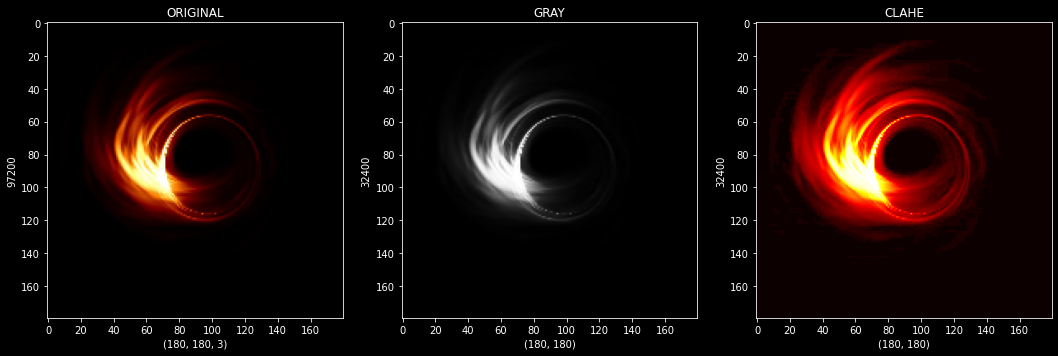

In [27]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)

Clahe_Func = cv2.createCLAHE(clipLimit=5.0,tileGridSize=(2,2))
Apply_Clahe = Clahe_Func.apply(Gray_IMG)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG,cmap="gray")

axis[1].set_xlabel(Gray_IMG.shape)
axis[1].set_ylabel(Gray_IMG.size)
axis[1].set_title("GRAY")
axis[1].imshow(Gray_IMG,cmap="gray")

axis[2].set_xlabel(Apply_Clahe.shape)
axis[2].set_ylabel(Apply_Clahe.size)
axis[2].set_title("CLAHE")
axis[2].imshow(Apply_Clahe,cmap="hot")

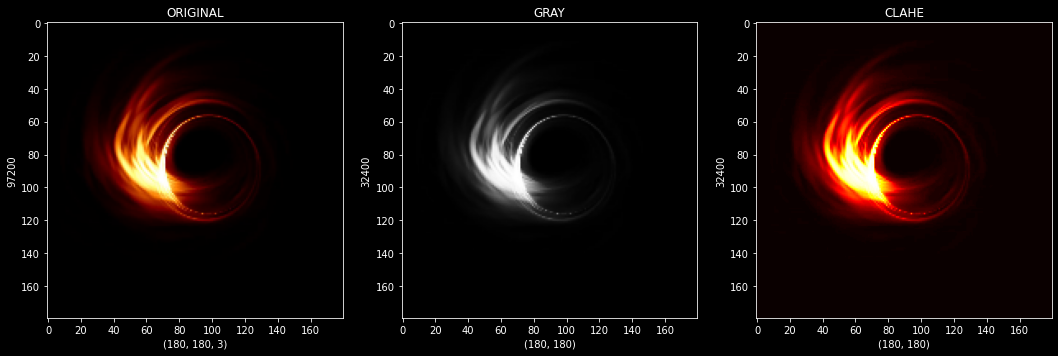

In [28]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)

Clahe_Func = cv2.createCLAHE(clipLimit=1.0,tileGridSize=(2,2))
Apply_Clahe = Clahe_Func.apply(Gray_IMG)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG,cmap="gray")

axis[1].set_xlabel(Gray_IMG.shape)
axis[1].set_ylabel(Gray_IMG.size)
axis[1].set_title("GRAY")
axis[1].imshow(Gray_IMG,cmap="gray")

axis[2].set_xlabel(Apply_Clahe.shape)
axis[2].set_ylabel(Apply_Clahe.size)
axis[2].set_title("CLAHE")
axis[2].imshow(Apply_Clahe,cmap="hot")

##### CONTOURS AND POLYDP

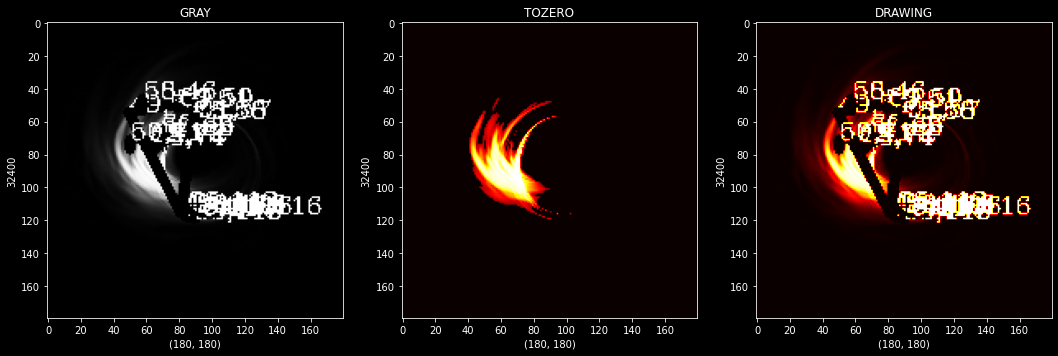

In [29]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(0,255,0),5)
    
    n_count = approx.ravel()
    i = 0
    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,0,255))
                
        i = i + 1
        
        
axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot")                

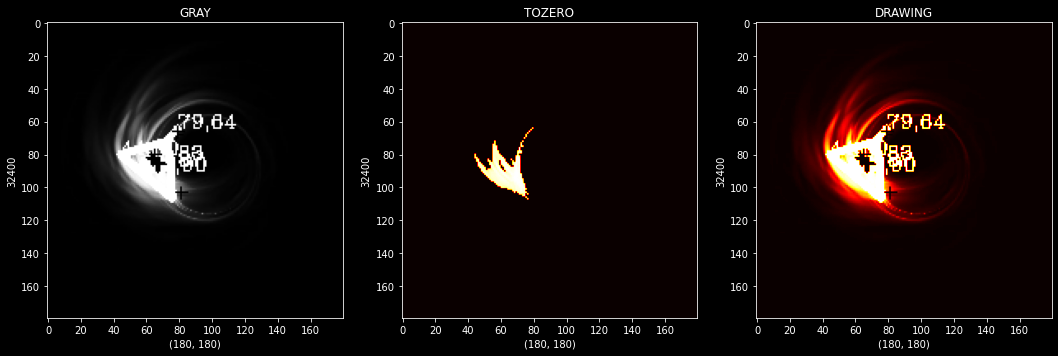

In [30]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[1]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,220,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(255,255,0),3)
    
    n_count = approx.ravel()
    i = 0
    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,255))
                
        i = i + 1
        
        
axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot")  

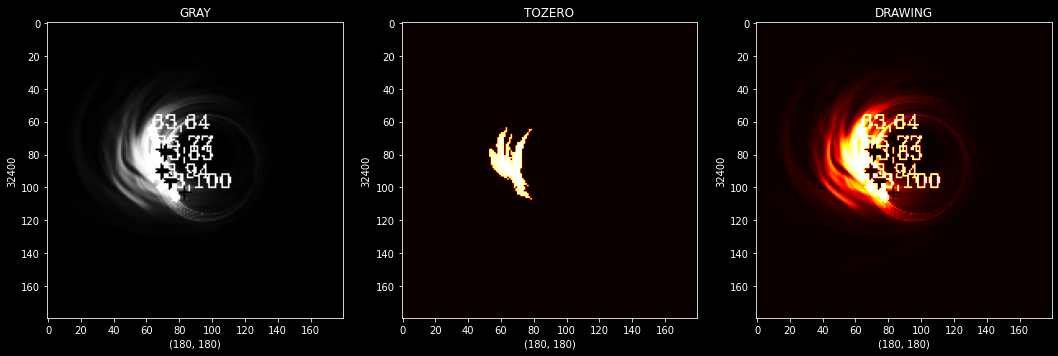

In [31]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[400]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,220,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(255,255,0),3)
    
    n_count = approx.ravel()
    i = 0
    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,255))
                
        i = i + 1
        
        
axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot") 

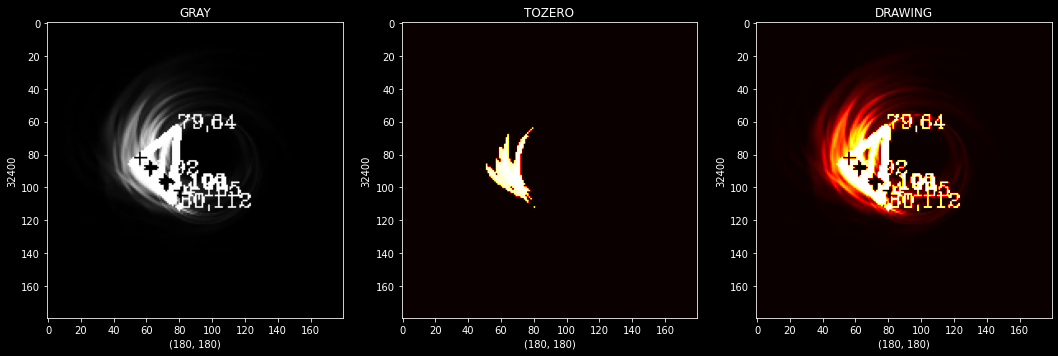

In [32]:
figure,axis = plt.subplots(1,3,figsize=(18,18))
Picking_IMG = Acc_List[277]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,220,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(255,255,0),3)
    
    n_count = approx.ravel()
    i = 0
    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,255))
                
        i = i + 1
        
        
axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot") 

##### APPROX OVERVIEW AND PROCESS

In [33]:
Picking_IMG = Acc_List[277]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,220,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(255,255,0),3)
    
    n_count = approx.ravel()
    i = 0
    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)

In [34]:
print(n_count)
print("--"*10)
print(n_count.shape)
print("--"*10)

[56 92 57 91 58 92 57 93]
--------------------
(8,)
--------------------


In [35]:
Reshaped_N = n_count.reshape(4,2)

print(Reshaped_N)
print("--"*10)
print(Reshaped_N.shape)
print("--"*10)

[[56 92]
 [57 91]
 [58 92]
 [57 93]]
--------------------
(4, 2)
--------------------


In [36]:
print(string_coor)

56 92


In [37]:
print("X: ",x)
print("Y: ",y)

X:  56
Y:  92


##### TRANSFORMATION OF COORDINATES / Measuring the Distance Between Singularity Point and Spiral Arms

* it is our main process

[ 44  81  76 107  73  72]
[61 90 62 89 63 90 62 91]
[60 89 61 88 62 89 61 90]
[59 87 60 86 61 88 60 89]
[58 85 59 84 60 86 59 87]
[80 63 74 70]


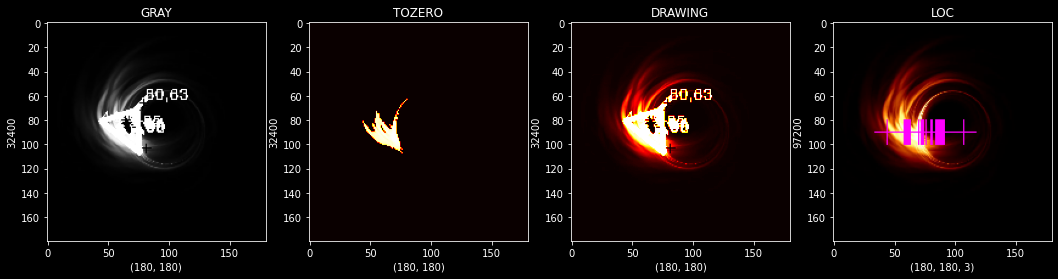

In [38]:
figure,axis = plt.subplots(1,4,figsize=(18,18))

Picking_IMG = Acc_List[2]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,220,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)

Total_Approx = []

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(255,255,0),3)
    
    n_count = approx.ravel()
    i = 0
    
    for x_cor in n_count:
        x_cor = int(x_cor)
        Marker_IMG = cv2.drawMarker(Copy_Main_IMG,(x_cor,int(Copy_Main_IMG.shape[1]/2)),(255,0,255),thickness=1)
    
    print(n_count)
    Total_Approx.append(n_count)
    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,255))
                
        i = i + 1
    
    

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot") 

axis[3].set_xlabel(Marker_IMG.shape)
axis[3].set_ylabel(Marker_IMG.size)
axis[3].set_title("LOC")
axis[3].imshow(Marker_IMG) 

* the distribution of the black hole can be observed depending on the distance between the lines

In [39]:
print("TOTAL ARRAY SHAPE: ",np.shape(np.array(Total_Approx)))

TOTAL ARRAY SHAPE:  (6,)


In [40]:
Array_Approx = np.array(Total_Approx)

In [41]:
print(Total_Approx)

[array([ 44,  81,  76, 107,  73,  72], dtype=int32), array([61, 90, 62, 89, 63, 90, 62, 91], dtype=int32), array([60, 89, 61, 88, 62, 89, 61, 90], dtype=int32), array([59, 87, 60, 86, 61, 88, 60, 89], dtype=int32), array([58, 85, 59, 84, 60, 86, 59, 87], dtype=int32), array([80, 63, 74, 70], dtype=int32)]


[46 88 50 96]
[70 67 70 68 69 69 70 68]
[ 62  67  80 112]
[72 91 73 90 74 91 73 92]


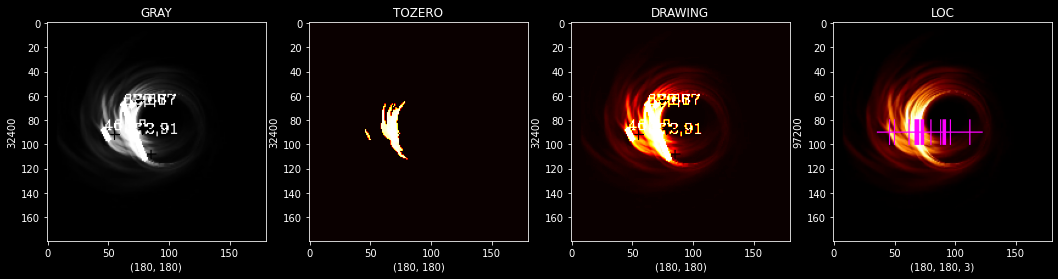

In [42]:
figure,axis = plt.subplots(1,4,figsize=(18,18))

Picking_IMG = Acc_List[488]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,220,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)


for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(255,255,0),3)
    
    n_count = approx.ravel()
    i = 0
    
    for x_cor in n_count:
        x_cor = int(x_cor)
        Marker_IMG = cv2.drawMarker(Copy_Main_IMG,(x_cor,int(Copy_Main_IMG.shape[1]/2)),(255,0,255),thickness=1)
    
    print(n_count)
    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,255))
                
        i = i + 1
    
    

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot") 

axis[3].set_xlabel(Marker_IMG.shape)
axis[3].set_ylabel(Marker_IMG.size)
axis[3].set_title("LOC")
axis[3].imshow(Marker_IMG) 

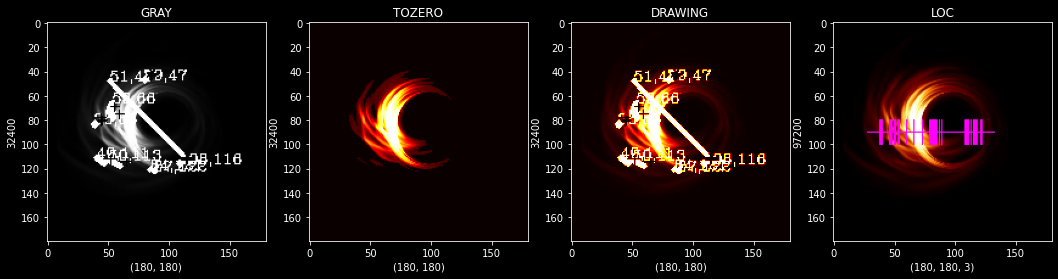

In [43]:
figure,axis = plt.subplots(1,4,figsize=(18,18))

Picking_IMG = Acc_List[510]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,20,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)


for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(255,255,0),3)
    
    n_count = approx.ravel()
    i = 0
    
    for x_cor in n_count:
        x_cor = int(x_cor)
        Marker_IMG = cv2.drawMarker(Copy_Main_IMG,(x_cor,int(Copy_Main_IMG.shape[1]/2)),(255,0,255),thickness=1)
    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,255))
                
        i = i + 1
    
    

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot") 

axis[3].set_xlabel(Marker_IMG.shape)
axis[3].set_ylabel(Marker_IMG.size)
axis[3].set_title("LOC")
axis[3].imshow(Marker_IMG) 

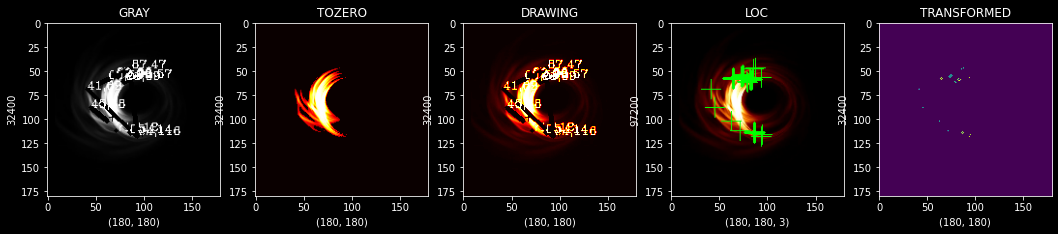

In [44]:
figure,axis = plt.subplots(1,5,figsize=(18,18))

Picking_IMG = Acc_List[510]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)


for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(0,255,0),3)
    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            Marker_IMG = cv2.drawMarker(Copy_Main_IMG,(int(x),int(y)),(0,255,0),thickness=1)
            Trans_Empty_Zeros[int(y),int(x)] = 1
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,255))
                
        i = i + 1
    
    

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot") 

axis[3].set_xlabel(Marker_IMG.shape)
axis[3].set_ylabel(Marker_IMG.size)
axis[3].set_title("LOC")
axis[3].imshow(Marker_IMG)

axis[4].set_xlabel(Trans_Empty_Zeros.shape)
axis[4].set_ylabel(Trans_Empty_Zeros.size)
axis[4].set_title("TRANSFORMED")
axis[4].imshow(Trans_Empty_Zeros) 

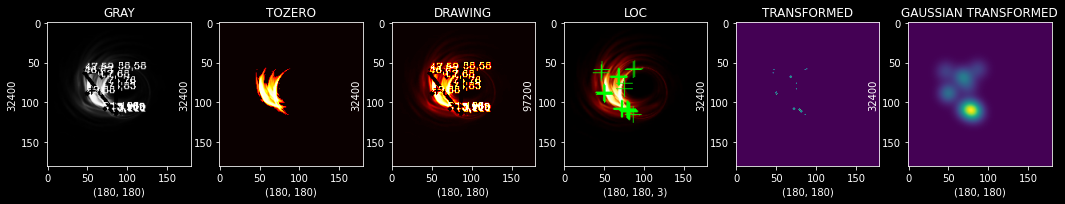

In [45]:
figure,axis = plt.subplots(1,6,figsize=(18,18))

Picking_IMG = Acc_List[55]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,90,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)


for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(0,255,0),3)
    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            Marker_IMG = cv2.drawMarker(Copy_Main_IMG,(int(x),int(y)),(0,255,0),thickness=1)
            Trans_Empty_Zeros[int(y),int(x)] = 1
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,255))
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=8,truncate=6*6)

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot") 

axis[3].set_xlabel(Marker_IMG.shape)
axis[3].set_ylabel(Marker_IMG.size)
axis[3].set_title("LOC")
axis[3].imshow(Marker_IMG)

axis[4].set_xlabel(Trans_Empty_Zeros.shape)
axis[4].set_ylabel(Trans_Empty_Zeros.size)
axis[4].set_title("TRANSFORMED")
axis[4].imshow(Trans_Empty_Zeros)


axis[5].set_xlabel(Gaus_IMG.shape)
axis[5].set_ylabel(Gaus_IMG.size)
axis[5].set_title("GAUSSIAN TRANSFORMED")
axis[5].imshow(Gaus_IMG) 

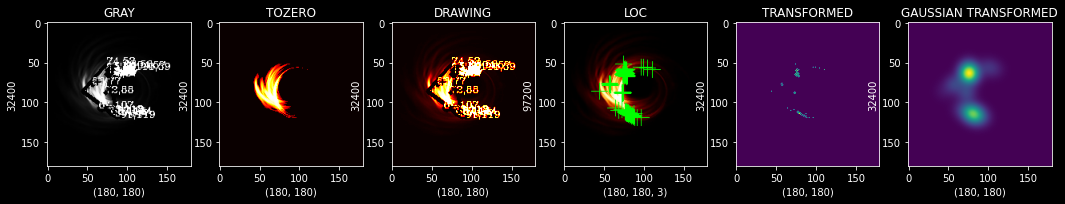

In [46]:
figure,axis = plt.subplots(1,6,figsize=(18,18))

Picking_IMG = Acc_List[100]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,55,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)


for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.09*cv2.arcLength(cnt,True),True)
    
    Drawing_Contour = cv2.drawContours(Gray_IMG,[approx],0,(0,255,0),3)
    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            
            Marker_IMG = cv2.drawMarker(Copy_Main_IMG,(int(x),int(y)),(0,255,0),thickness=1)
            Trans_Empty_Zeros[int(y),int(x)] = 1
            
            if (i == 0):
                cv2.putText(Gray_IMG,f"{x},{y}",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(255,0,255))
            else:
                cv2.putText(Gray_IMG,"+",(x,y),cv2.FONT_HERSHEY_COMPLEX,0.4,(0,0,255))
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=8,truncate=4*4)

axis[0].set_xlabel(Gray_IMG.shape)
axis[0].set_ylabel(Gray_IMG.size)
axis[0].set_title("GRAY")
axis[0].imshow(Gray_IMG,cmap="gray")

axis[1].set_xlabel(Threshold_IMG_TOZERO.shape)
axis[1].set_ylabel(Threshold_IMG_TOZERO.size)
axis[1].set_title("TOZERO")
axis[1].imshow(Threshold_IMG_TOZERO,cmap="hot")

axis[2].set_xlabel(Drawing_Contour.shape)
axis[2].set_ylabel(Drawing_Contour.size)
axis[2].set_title("DRAWING")
axis[2].imshow(Drawing_Contour,cmap="hot") 

axis[3].set_xlabel(Marker_IMG.shape)
axis[3].set_ylabel(Marker_IMG.size)
axis[3].set_title("LOC")
axis[3].imshow(Marker_IMG)

axis[4].set_xlabel(Trans_Empty_Zeros.shape)
axis[4].set_ylabel(Trans_Empty_Zeros.size)
axis[4].set_title("TRANSFORMED")
axis[4].imshow(Trans_Empty_Zeros)


axis[5].set_xlabel(Gaus_IMG.shape)
axis[5].set_ylabel(Gaus_IMG.size)
axis[5].set_title("GAUSSIAN TRANSFORMED")
axis[5].imshow(Gaus_IMG) 

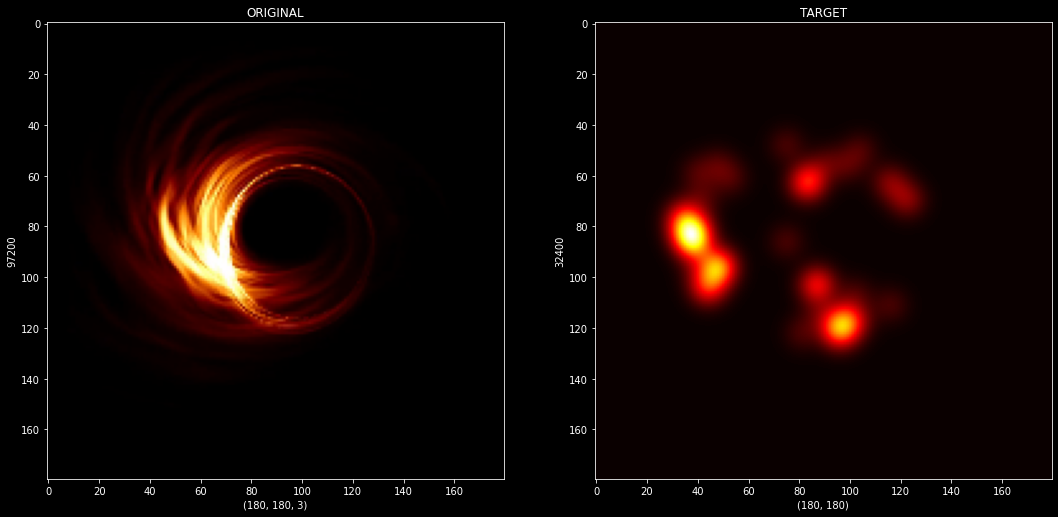

In [47]:
figure,axis = plt.subplots(1,2,figsize=(18,18))

Picking_IMG = Acc_List[100]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,20,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)


for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            Trans_Empty_Zeros[int(y),int(x)] = 1
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG)

axis[1].set_xlabel(Gaus_IMG.shape)
axis[1].set_ylabel(Gaus_IMG.size)
axis[1].set_title("TARGET")
axis[1].imshow(Gaus_IMG,cmap="hot")

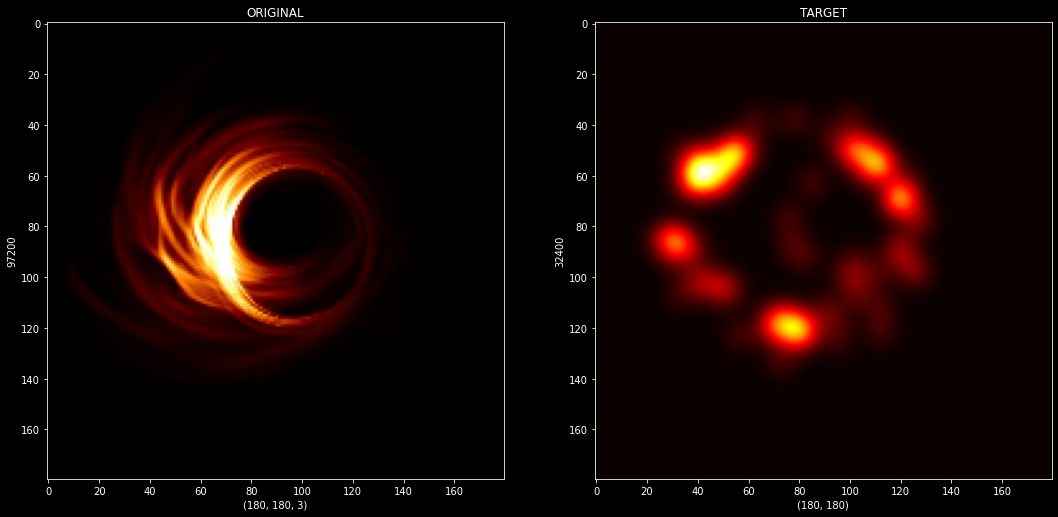

In [48]:
figure,axis = plt.subplots(1,2,figsize=(18,18))

Picking_IMG = Acc_List[500]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,10,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)


for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            Trans_Empty_Zeros[int(y),int(x)] = 1
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG)

axis[1].set_xlabel(Gaus_IMG.shape)
axis[1].set_ylabel(Gaus_IMG.size)
axis[1].set_title("TARGET")
axis[1].imshow(Gaus_IMG,cmap="hot")

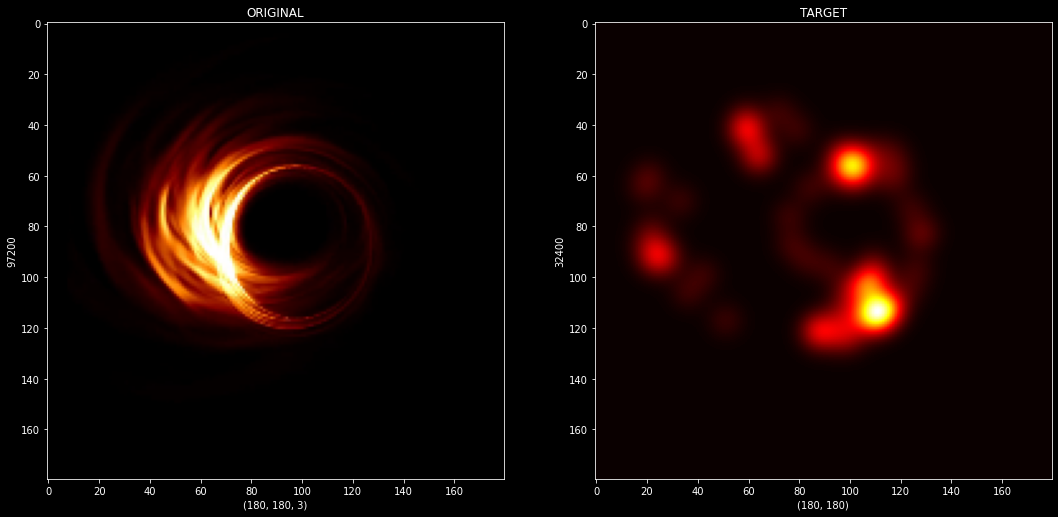

In [49]:
figure,axis = plt.subplots(1,2,figsize=(18,18))

Picking_IMG = Acc_List[387]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,10,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)


for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            Trans_Empty_Zeros[int(y),int(x)] = 1
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG)

axis[1].set_xlabel(Gaus_IMG.shape)
axis[1].set_ylabel(Gaus_IMG.size)
axis[1].set_title("TARGET")
axis[1].imshow(Gaus_IMG,cmap="hot")

##### KEYPOINTS WITH COORDINATES

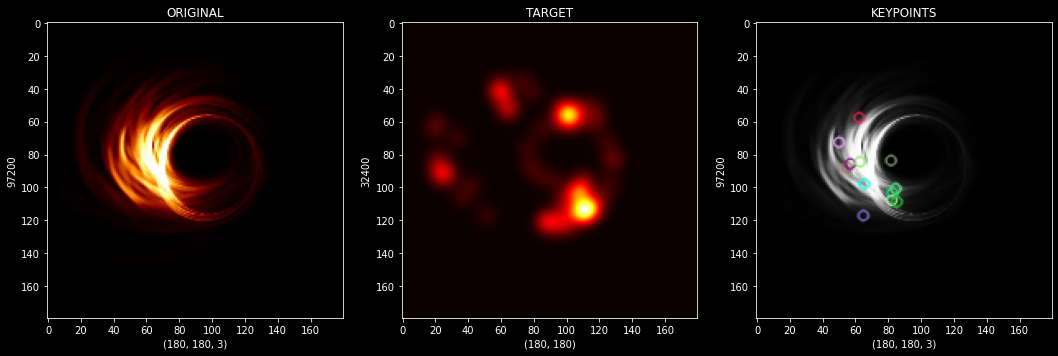

In [50]:
figure,axis = plt.subplots(1,3,figsize=(18,18))

Picking_IMG = Acc_List[387]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,10,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            Trans_Empty_Zeros[int(y),int(x)] = 1
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)

Sift_Function = cv2.SIFT_create()
keypoints,desc = Sift_Function.detectAndCompute(Threshold_IMG_TOZERO,None)
Key_IMG = cv2.drawKeypoints(Gray_IMG,keypoints,Gray_IMG)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG)

axis[1].set_xlabel(Gaus_IMG.shape)
axis[1].set_ylabel(Gaus_IMG.size)
axis[1].set_title("TARGET")
axis[1].imshow(Gaus_IMG,cmap="hot")

axis[2].set_xlabel(Key_IMG.shape)
axis[2].set_ylabel(Key_IMG.size)
axis[2].set_title("KEYPOINTS")
axis[2].imshow(Key_IMG)

##### SKELETON WITH TARGET

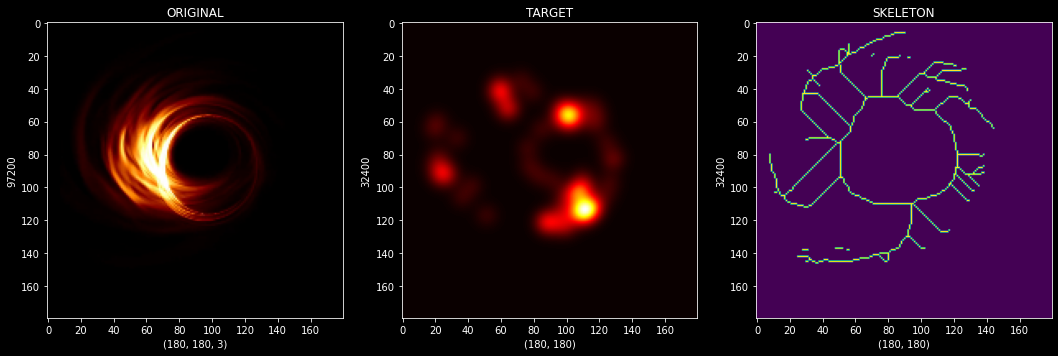

In [51]:
figure,axis = plt.subplots(1,3,figsize=(18,18))

Picking_IMG = Acc_List[387]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,10,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            Trans_Empty_Zeros[int(y),int(x)] = 1
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)
Array_Target = np.array(Gray_IMG > Gaus_IMG).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Array_Target)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG)

axis[1].set_xlabel(Gaus_IMG.shape)
axis[1].set_ylabel(Gaus_IMG.size)
axis[1].set_title("TARGET")
axis[1].imshow(Gaus_IMG,cmap="hot")

axis[2].set_xlabel(Skeleton_IMG.shape)
axis[2].set_ylabel(Skeleton_IMG.size)
axis[2].set_title("SKELETON")
axis[2].imshow(Skeleton_IMG)

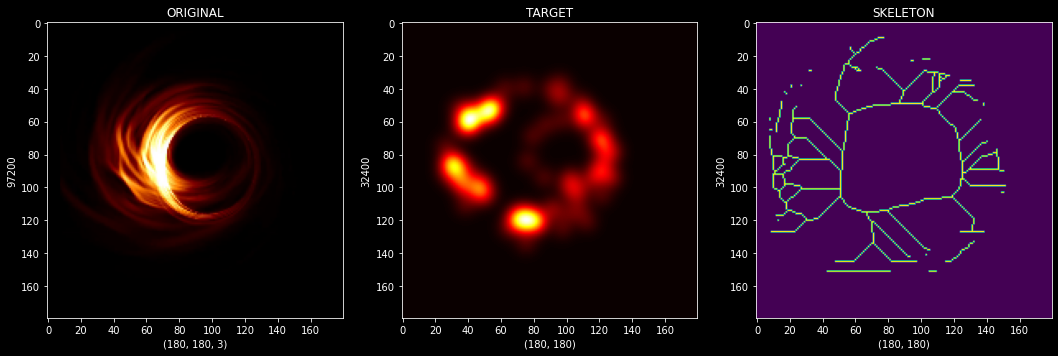

In [52]:
figure,axis = plt.subplots(1,3,figsize=(18,18))

Picking_IMG = Acc_List[501]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,10,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            Trans_Empty_Zeros[int(y),int(x)] = 1
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)
Array_Target = np.array(Gray_IMG > Gaus_IMG).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Array_Target)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG)

axis[1].set_xlabel(Gaus_IMG.shape)
axis[1].set_ylabel(Gaus_IMG.size)
axis[1].set_title("TARGET")
axis[1].imshow(Gaus_IMG,cmap="hot")

axis[2].set_xlabel(Skeleton_IMG.shape)
axis[2].set_ylabel(Skeleton_IMG.size)
axis[2].set_title("SKELETON")
axis[2].imshow(Skeleton_IMG)

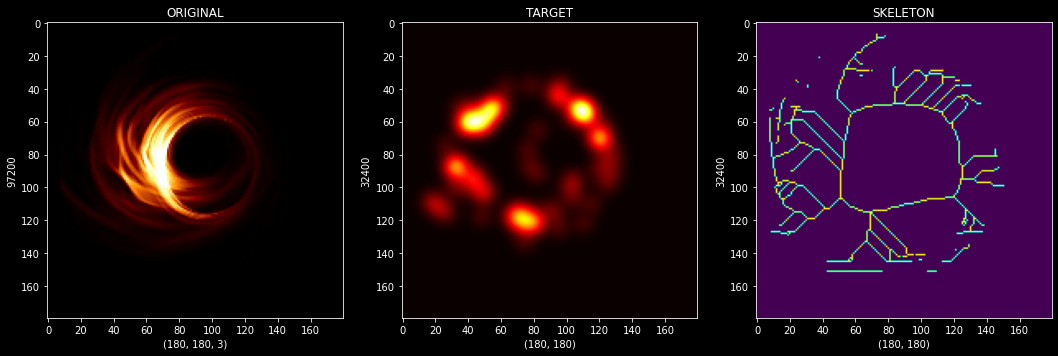

In [53]:
figure,axis = plt.subplots(1,3,figsize=(18,18))

Picking_IMG = Acc_List[499]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,10,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            Trans_Empty_Zeros[int(y),int(x)] = 1
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)
Array_Target = np.array(Gray_IMG > Gaus_IMG).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Array_Target)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG)

axis[1].set_xlabel(Gaus_IMG.shape)
axis[1].set_ylabel(Gaus_IMG.size)
axis[1].set_title("TARGET")
axis[1].imshow(Gaus_IMG,cmap="hot")

axis[2].set_xlabel(Skeleton_IMG.shape)
axis[2].set_ylabel(Skeleton_IMG.size)
axis[2].set_title("SKELETON")
axis[2].imshow(Skeleton_IMG)

##### HESSIAN SPECTRUM WITH TARGET

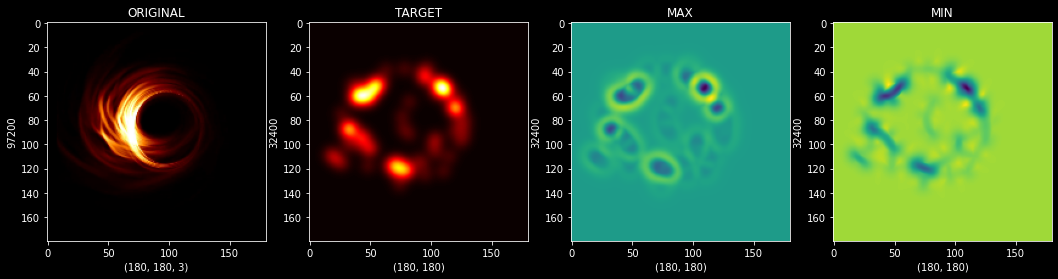

In [54]:
figure,axis = plt.subplots(1,4,figsize=(18,18))

Picking_IMG = Acc_List[499]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,10,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            Trans_Empty_Zeros[int(y),int(x)] = 1
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)

Hessian_IMG = hessian_matrix(Gaus_IMG,sigma=0.5,order="rc")
max_IMG,min_IMG = hessian_matrix_eigvals(Hessian_IMG)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG)

axis[1].set_xlabel(Gaus_IMG.shape)
axis[1].set_ylabel(Gaus_IMG.size)
axis[1].set_title("TARGET")
axis[1].imshow(Gaus_IMG,cmap="hot")

axis[2].set_xlabel(max_IMG.shape)
axis[2].set_ylabel(max_IMG.size)
axis[2].set_title("MAX")
axis[2].imshow(max_IMG)

axis[3].set_xlabel(min_IMG.shape)
axis[3].set_ylabel(min_IMG.size)
axis[3].set_title("MIN")
axis[3].imshow(min_IMG)

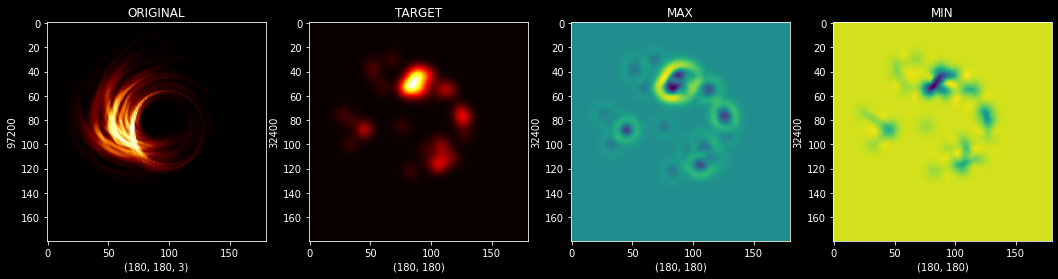

In [55]:
figure,axis = plt.subplots(1,4,figsize=(18,18))

Picking_IMG = Acc_List[34]
Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
_,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,10,255,cv2.THRESH_TOZERO)
Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


Copy_Main_IMG = Picking_IMG.copy()
Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)

for cnt in Contours:
    
    approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
    n_count = approx.ravel()
    i = 0

    
    for j in n_count:
        if (i % 2 == 0):
            x = n_count[i]
            y = n_count[i + 1]
            
            string_coor = str(x) + " " + str(y)
            Trans_Empty_Zeros[int(y),int(x)] = 1
                
        i = i + 1
    
    

Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)

Hessian_IMG = hessian_matrix(Gaus_IMG,sigma=0.5,order="rc")
max_IMG,min_IMG = hessian_matrix_eigvals(Hessian_IMG)

axis[0].set_xlabel(Picking_IMG.shape)
axis[0].set_ylabel(Picking_IMG.size)
axis[0].set_title("ORIGINAL")
axis[0].imshow(Picking_IMG)

axis[1].set_xlabel(Gaus_IMG.shape)
axis[1].set_ylabel(Gaus_IMG.size)
axis[1].set_title("TARGET")
axis[1].imshow(Gaus_IMG,cmap="hot")

axis[2].set_xlabel(max_IMG.shape)
axis[2].set_ylabel(max_IMG.size)
axis[2].set_title("MAX")
axis[2].imshow(max_IMG)

axis[3].set_xlabel(min_IMG.shape)
axis[3].set_ylabel(min_IMG.size)
axis[3].set_title("MIN")
axis[3].imshow(min_IMG)

# DATA PROCESS

#### TRANSFORMATION

In [56]:
Original_List = []
Target_List = []

for image_x in Acc_List:
    
    Picking_IMG = image_x
    Gray_IMG = cv2.cvtColor(Picking_IMG,cv2.COLOR_RGB2GRAY)
    _,Threshold_IMG_TOZERO = cv2.threshold(Gray_IMG,10,255,cv2.THRESH_TOZERO)
    Contours,_ = cv2.findContours(Threshold_IMG_TOZERO,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)


    Copy_Main_IMG = Picking_IMG.copy()
    Trans_Empty_Zeros = np.zeros((Copy_Main_IMG.shape[0],Copy_Main_IMG.shape[1]),dtype=np.float32)

    for cnt in Contours:

        approx = cv2.approxPolyDP(cnt,0.009*cv2.arcLength(cnt,True),True)    
        n_count = approx.ravel()
        i = 0


        for j in n_count:
            if (i % 2 == 0):
                x = n_count[i]
                y = n_count[i + 1]

                string_coor = str(x) + " " + str(y)
                Trans_Empty_Zeros[int(y),int(x)] = 1

            i = i + 1



    Gaus_IMG = gaussian_filter(Trans_Empty_Zeros,sigma=5,truncate=4*4)
    
    Original_List.append(Picking_IMG)
    Target_List.append(Gaus_IMG)

In [57]:
print("WHEN IT IS ARRAY ORIGINAL SHAPE: ",np.shape(np.array(Original_List)))
print("WHEN IT IS ARRAY TARGET SHAPE: ",np.shape(np.array(Target_List)))

WHEN IT IS ARRAY ORIGINAL SHAPE:  (513, 180, 180, 3)
WHEN IT IS ARRAY TARGET SHAPE:  (513, 180, 180)


Text(0.5, 1.0, 'TARGET')

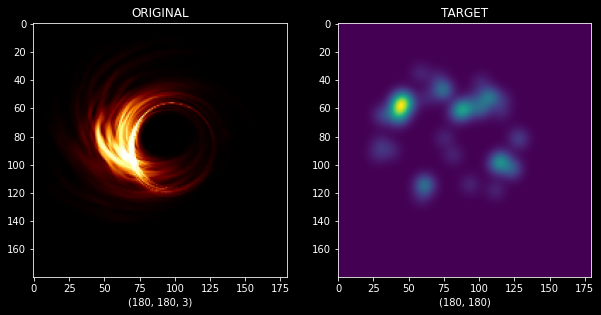

In [58]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Original_List[100])
axis[0].set_xlabel(Original_List[100].shape)
axis[0].set_title("ORIGINAL")
axis[1].imshow(Target_List[100])
axis[1].set_xlabel(Target_List[100].shape)
axis[1].set_title("TARGET")

Text(0.5, 1.0, 'TARGET')

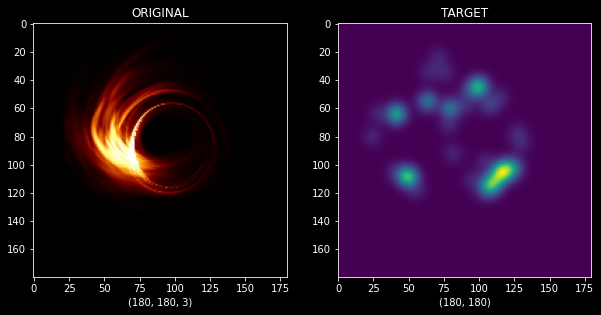

In [59]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Original_List[1])
axis[0].set_xlabel(Original_List[1].shape)
axis[0].set_title("ORIGINAL")
axis[1].imshow(Target_List[1])
axis[1].set_xlabel(Target_List[1].shape)
axis[1].set_title("TARGET")

Text(0.5, 1.0, 'TARGET')

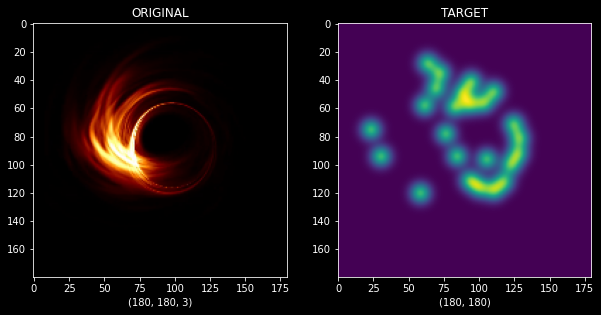

In [60]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Original_List[10])
axis[0].set_xlabel(Original_List[10].shape)
axis[0].set_title("ORIGINAL")
axis[1].imshow(Target_List[10])
axis[1].set_xlabel(Target_List[10].shape)
axis[1].set_title("TARGET")

Text(0.5, 1.0, 'TARGET')

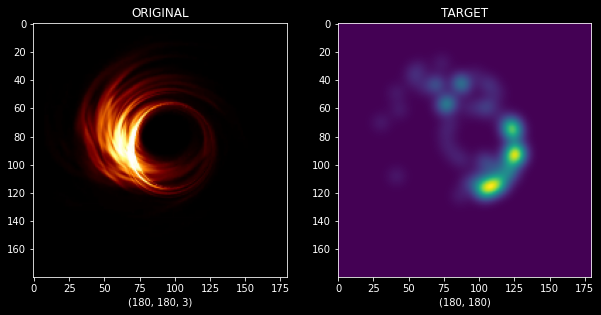

In [61]:
figure,axis = plt.subplots(1,2,figsize=(10,10))

axis[0].imshow(Original_List[300])
axis[0].set_xlabel(Original_List[300].shape)
axis[0].set_title("ORIGINAL")
axis[1].imshow(Target_List[300])
axis[1].set_xlabel(Target_List[300].shape)
axis[1].set_title("TARGET")

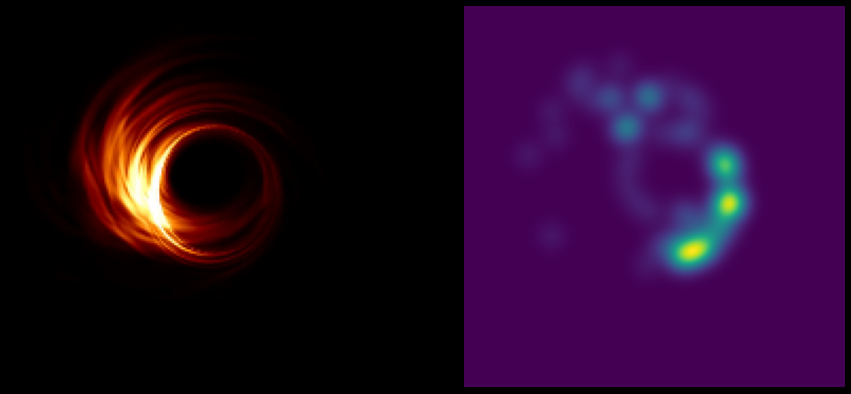

In [62]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 300 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

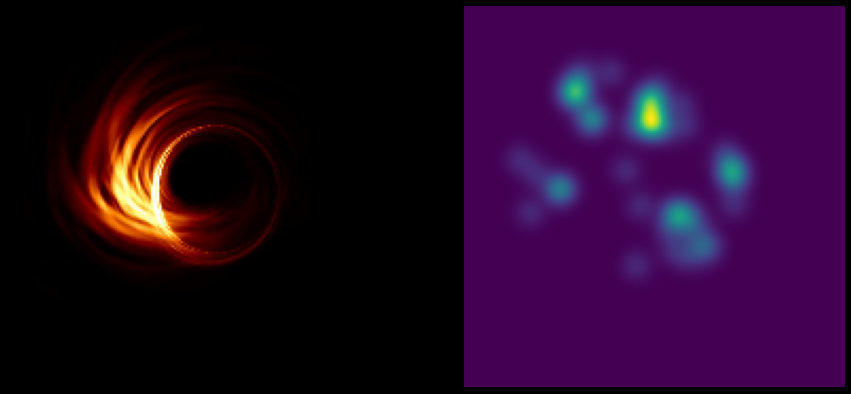

In [63]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 30 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

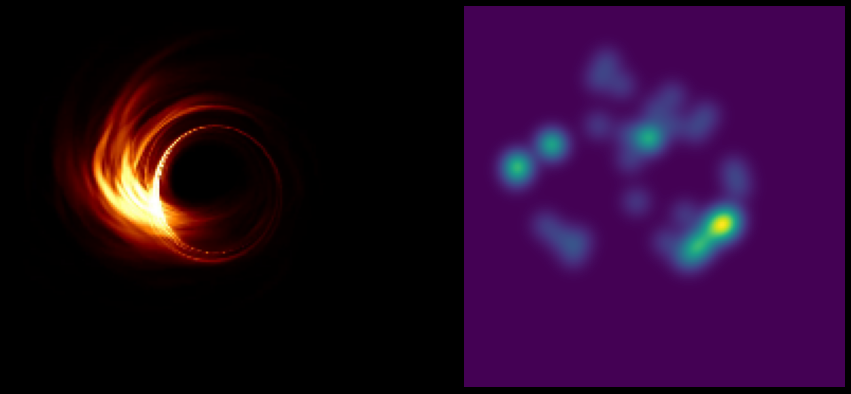

In [64]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 3 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

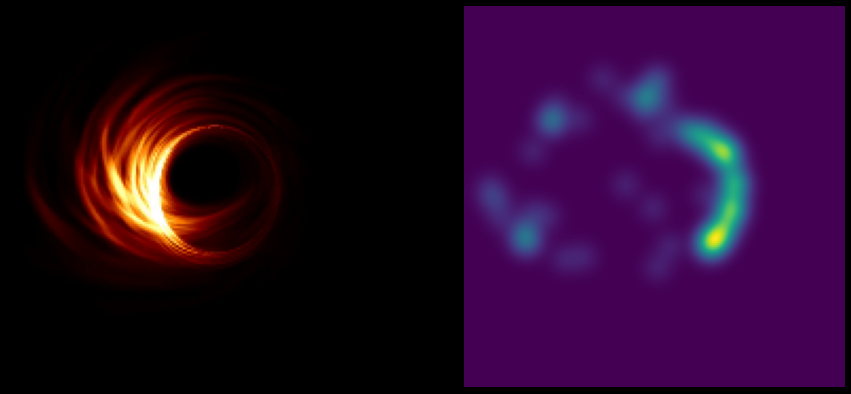

In [65]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 450 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

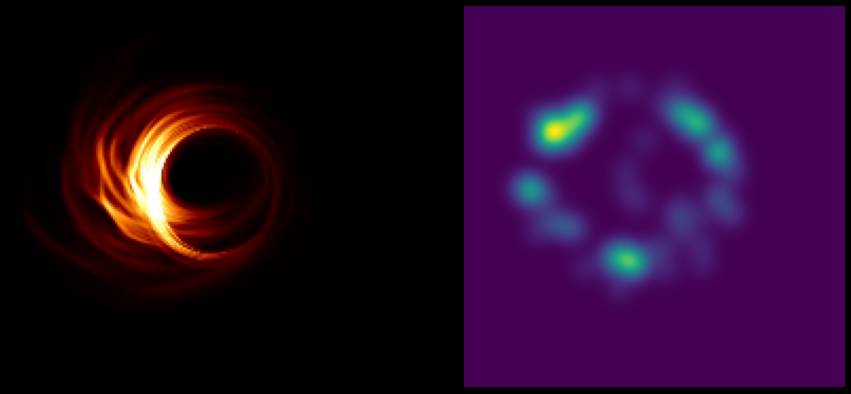

In [66]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 500 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

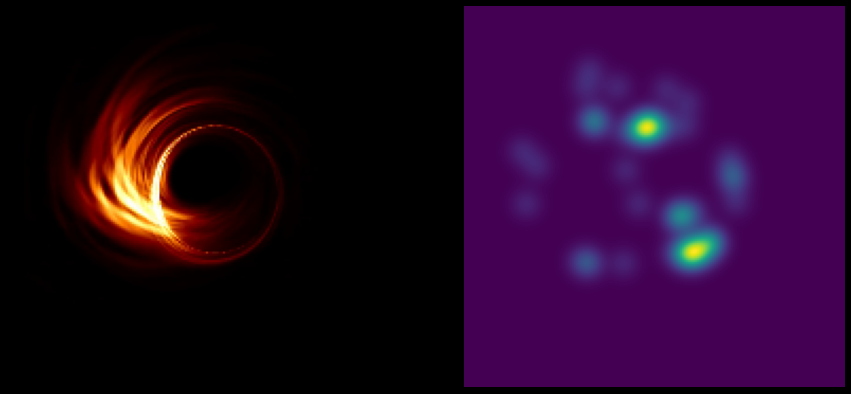

In [67]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 22 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

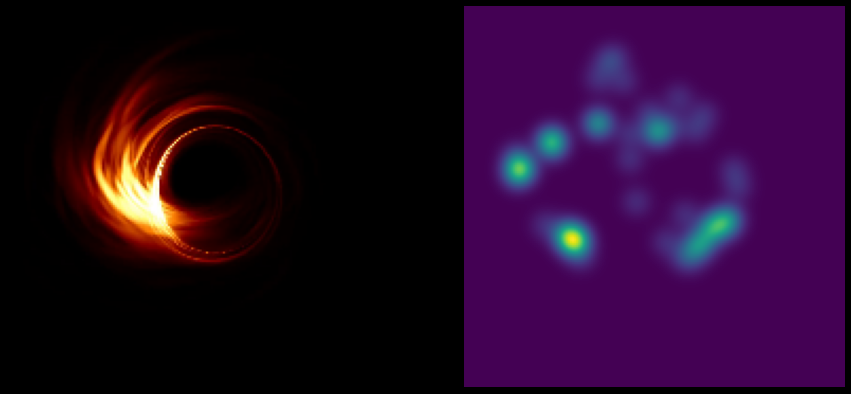

In [68]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 2 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

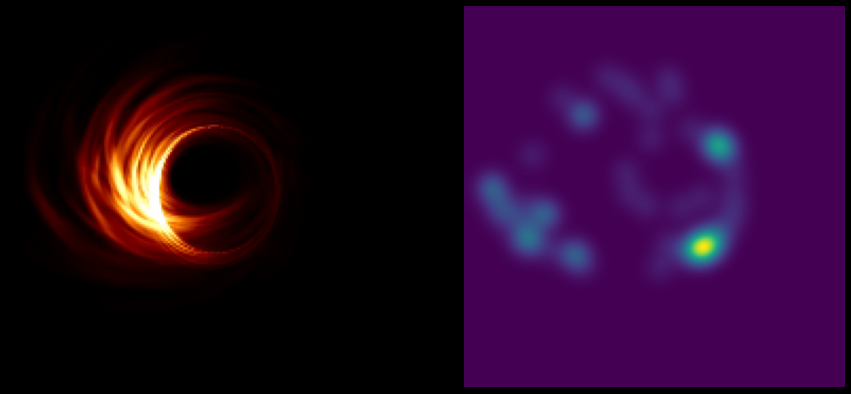

In [69]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 444 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

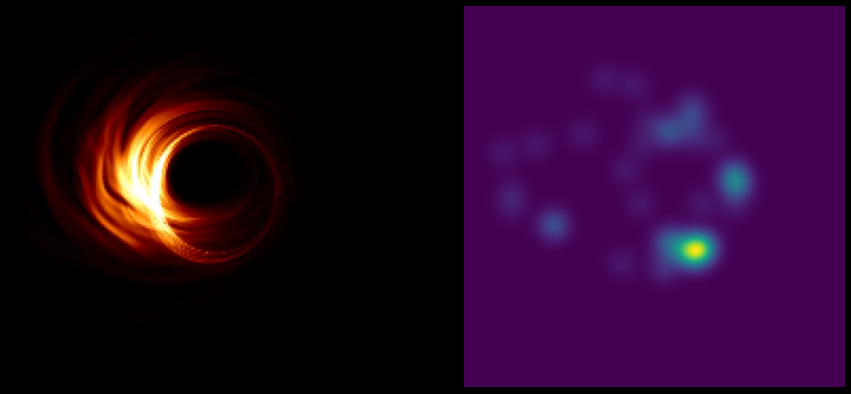

In [70]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 401 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

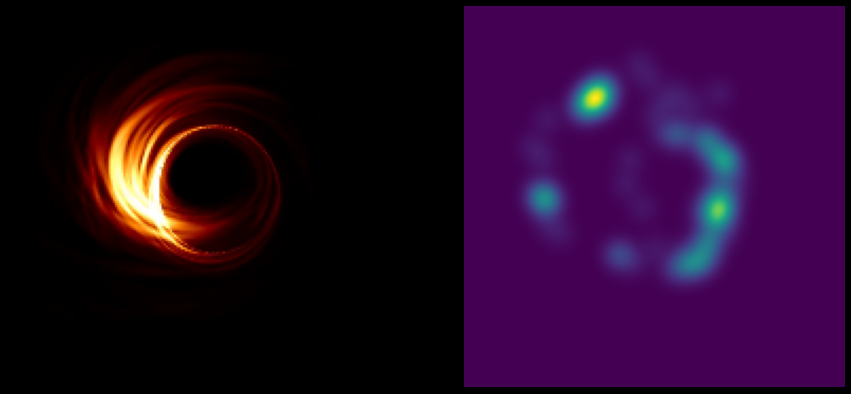

In [71]:
figure,axis = plt.subplots(1,2,figsize=(15,15))

Count_IMG = 230 

axis[0].imshow(Original_List[Count_IMG])
axis[0].axis("off")
axis[1].imshow(Target_List[Count_IMG])
axis[1].axis("off")

plt.savefig(f"IMG{Count_IMG}.png")

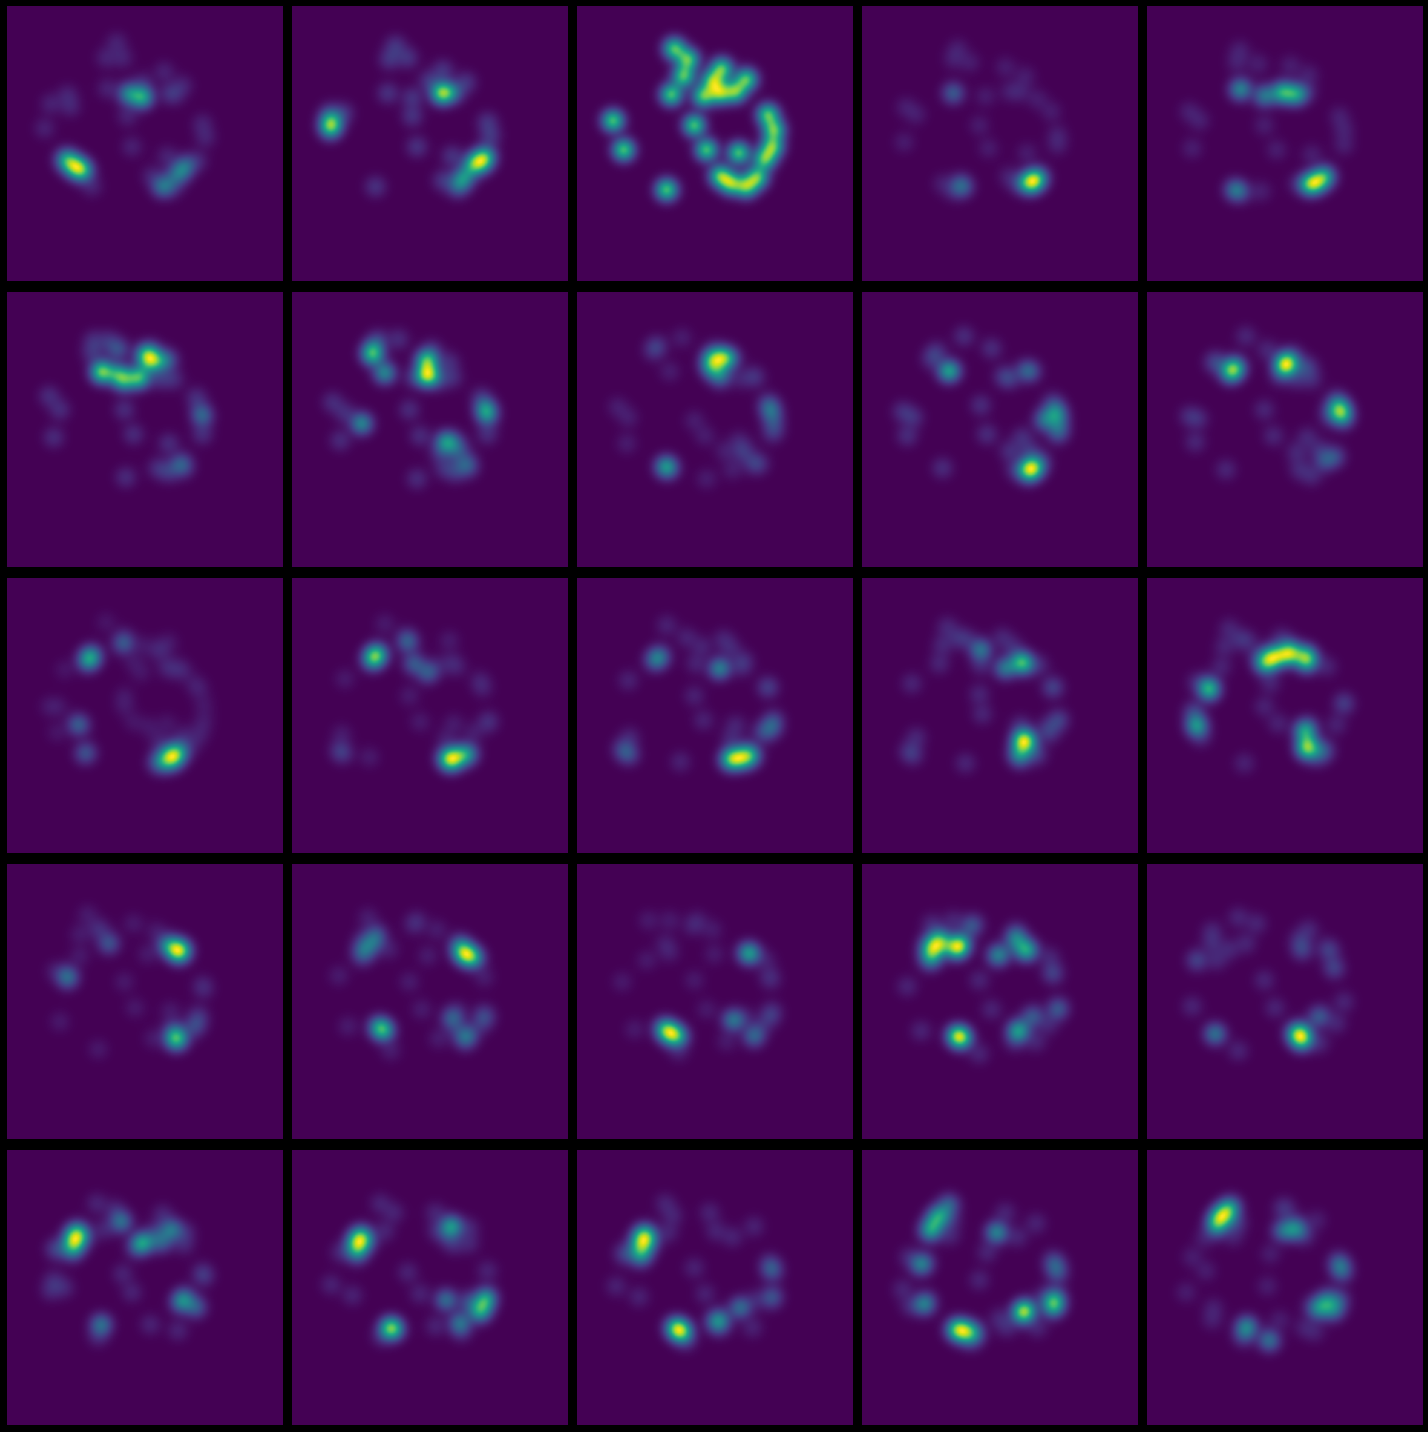

In [72]:
figure,axis = plt.subplots(5,5,figsize=(20,20))

for indexing,operations in enumerate(axis.flat):
    
    Picking_IMG = Target_List[indexing*5]
    
    operations.imshow(Picking_IMG)
    operations.axis("off")
    plt.savefig(f"IMG_TOTAL{indexing}.png")
    
plt.tight_layout()
plt.show()

#### TO ARRAY

In [73]:
Train_Set = np.array(Original_List,dtype="float32")
Transformation_Set = np.array(Target_List,dtype="float32")

Train_Set = Train_Set / 255.
Transformation_Set = Transformation_Set / 255.

In [74]:
print(Train_Set.shape)
print(Transformation_Set.shape)

(513, 180, 180, 3)
(513, 180, 180)


# MODEL PROCESS

In [75]:
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")
Reduce_Model = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy",
                                                   factor=0.02,
                                                    min_delta=0.0001,
                                                   patience=5)

compile_loss = "binary_crossentropy"
compile_optimizer = Adam(lr=0.0000001)
output_class = 1

In [76]:
Encoder_G = Sequential()
Encoder_G.add(Conv2D(32,(7,7),kernel_initializer = 'he_normal',use_bias=True))
Encoder_G.add(BatchNormalization())
Encoder_G.add(ReLU())
#
Encoder_G.add(Conv2D(64,(7,7),kernel_initializer = 'he_normal',use_bias=True))
Encoder_G.add(BatchNormalization())
Encoder_G.add(ReLU())
#
Encoder_G.add(Conv2D(128,(2,2),kernel_initializer = 'he_normal',use_bias=True))
Encoder_G.add(BatchNormalization())
Encoder_G.add(ReLU())


Decoder_G = Sequential()
Decoder_G.add(Conv2DTranspose(64,(7,7)))
Decoder_G.add(ReLU())
#
Decoder_G.add(Conv2DTranspose(32,(7,7)))
Decoder_G.add(ReLU())
#
Decoder_G.add(Conv2DTranspose(output_class,(2,2)))

In [77]:
Auto_Encoder = Sequential([Encoder_G,Decoder_G])
Auto_Encoder.compile(loss=compile_loss,optimizer=compile_optimizer,metrics=["mse"])

In [78]:
Model_AutoEncoder = Auto_Encoder.fit(Train_Set,Transformation_Set,epochs=25,callbacks=[Checkpoint_Model,Reduce_Model])

Epoch 1/25
17/17 [==============================] - 13s 340ms/step - loss: 1.0367 - mse: 0.2234
Epoch 2/25
17/17 [==============================] - 6s 327ms/step - loss: 1.0035 - mse: 0.2155
Epoch 3/25
17/17 [==============================] - 6s 327ms/step - loss: 0.9719 - mse: 0.2077
Epoch 4/25
17/17 [==============================] - 6s 326ms/step - loss: 0.9425 - mse: 0.2012
Epoch 5/25
17/17 [==============================] - 6s 327ms/step - loss: 0.9163 - mse: 0.1948
Epoch 6/25
17/17 [==============================] - 6s 327ms/step - loss: 0.8901 - mse: 0.1883
Epoch 7/25
17/17 [==============================] - 6s 327ms/step - loss: 0.8613 - mse: 0.1827
Epoch 8/25
17/17 [==============================] - 6s 326ms/step - loss: 0.8332 - mse: 0.1771
Epoch 9/25
17/17 [==============================] - 6s 327ms/step - loss: 0.8048 - mse: 0.1710
Epoch 10/25
17/17 [==============================] - 6s 327ms/step - loss: 0.7772 - mse: 0.1655
Epoch 11/25
17/17 [=============================

In [79]:
Prediction_IMG = Auto_Encoder.predict(Train_Set)

Text(0.5, 1.0, 'PREDICTION')

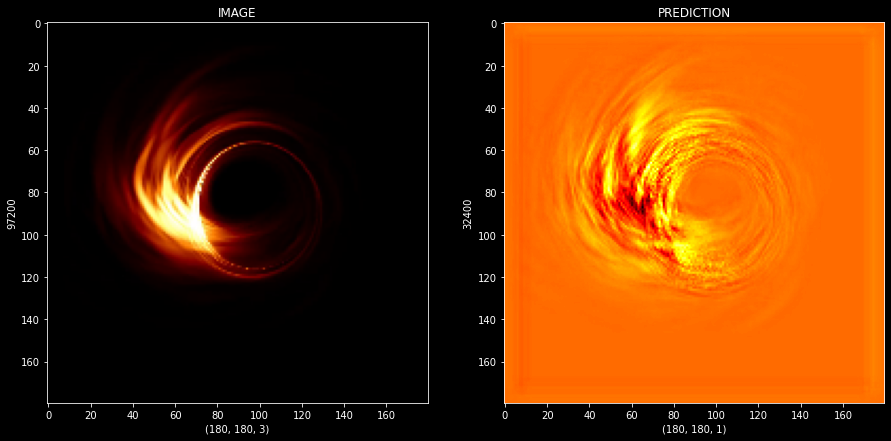

In [80]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 1

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="hot")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

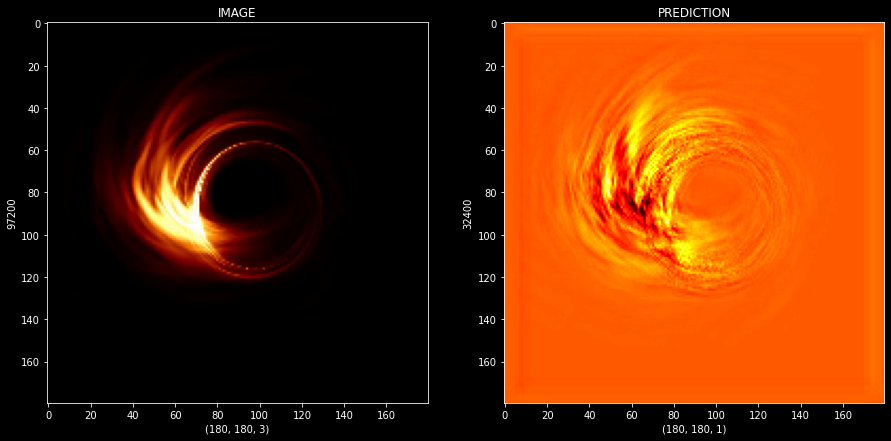

In [81]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 5

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="hot")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

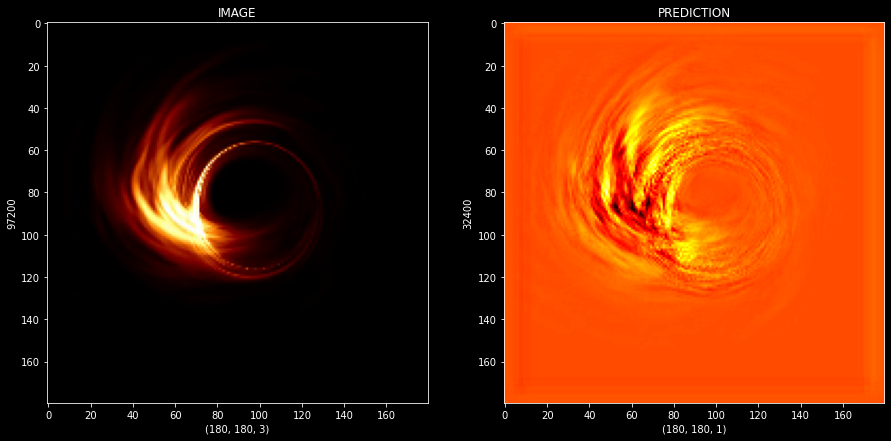

In [82]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 8

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="hot")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

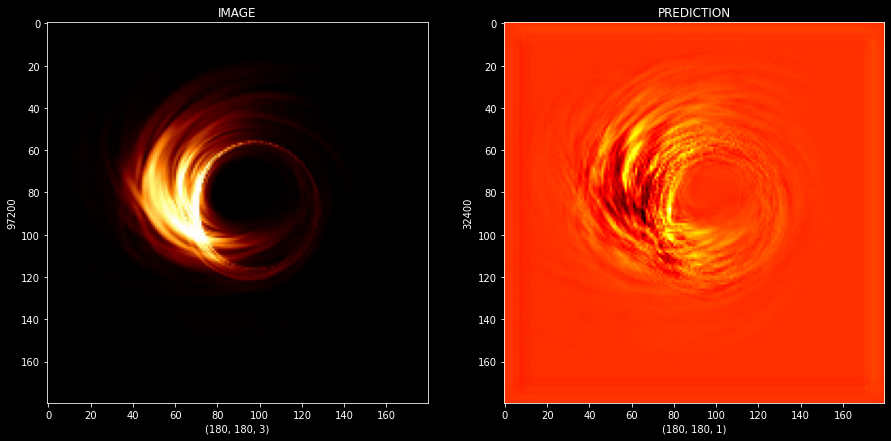

In [83]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 250

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="hot")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

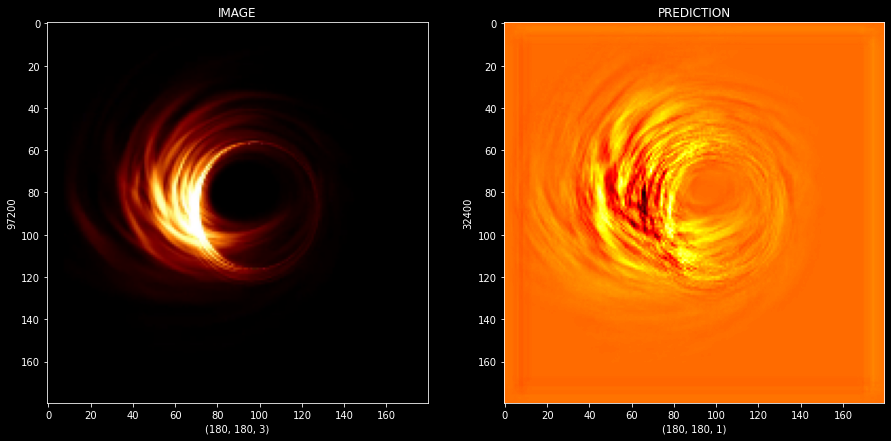

In [84]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 444

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="hot")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

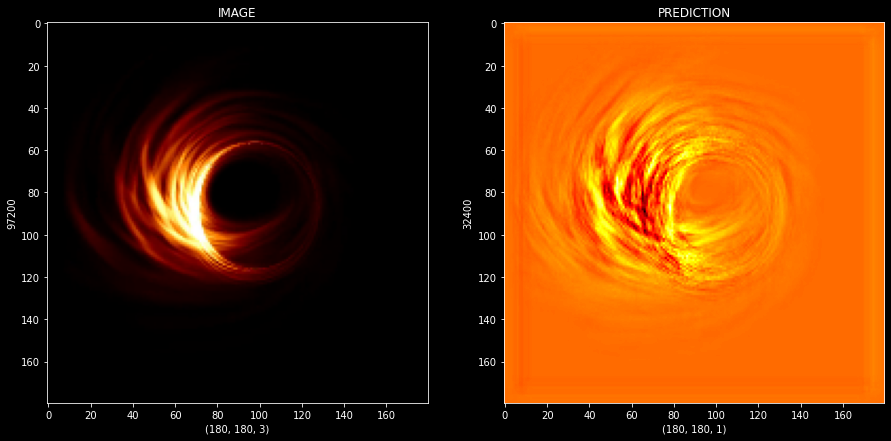

In [85]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 450

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="hot")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

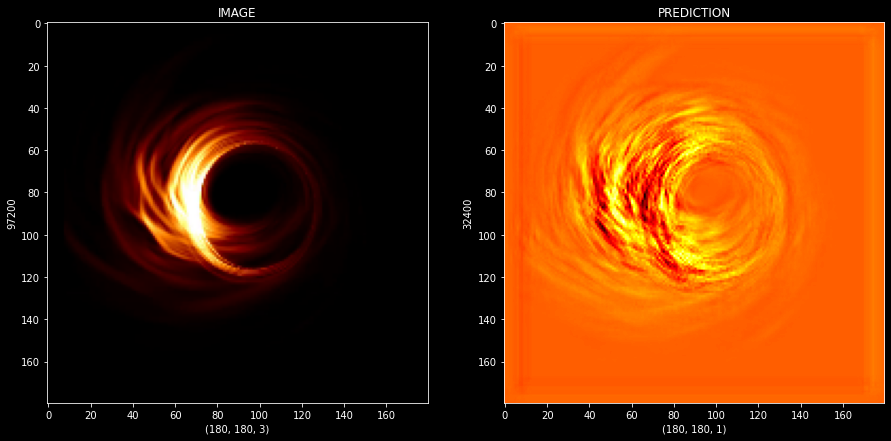

In [86]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 500

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="hot")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

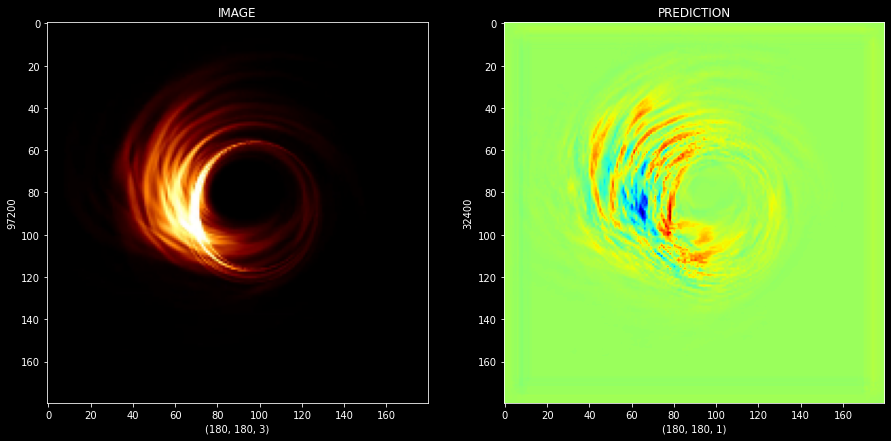

In [87]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 288

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="jet")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

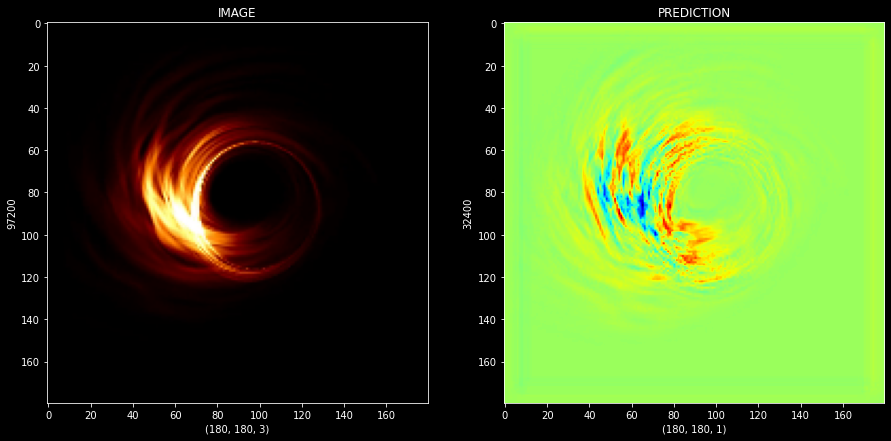

In [88]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 88

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="jet")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

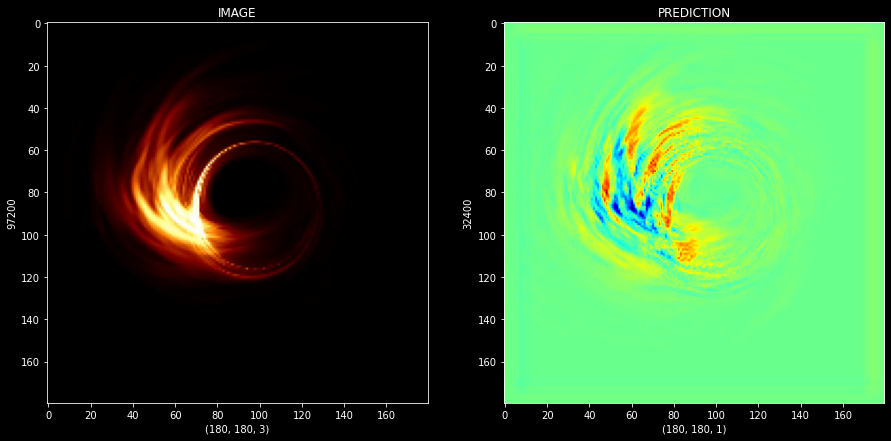

In [89]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 8

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="jet")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")

Text(0.5, 1.0, 'PREDICTION')

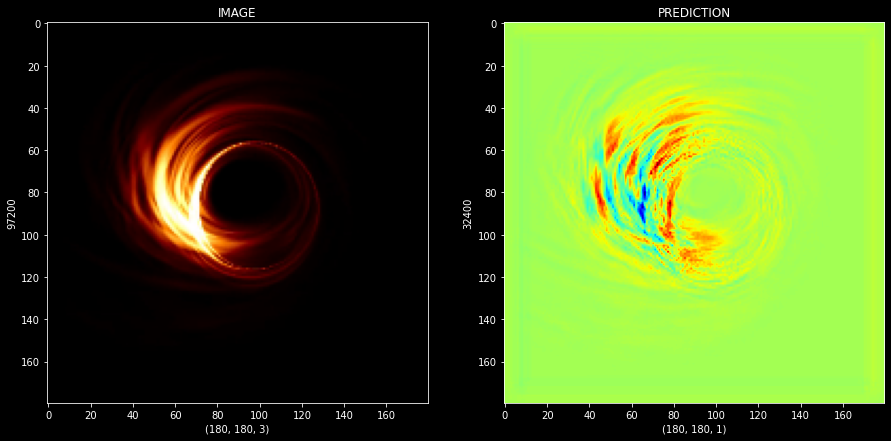

In [90]:
figure,axis = plt.subplots(1,2,figsize=(15,15))
prediction_img_number = 221

Original_Img = Train_Set[prediction_img_number]
Predict_Target = Prediction_IMG[prediction_img_number]

axis[0].imshow(Original_Img)
axis[0].set_xlabel(Original_Img.shape)
axis[0].set_ylabel(Original_Img.size)
axis[0].set_title("IMAGE")
axis[1].imshow(Predict_Target,cmap="jet")
axis[1].set_xlabel(Predict_Target.shape)
axis[1].set_ylabel(Predict_Target.size)
axis[1].set_title("PREDICTION")